# Bank Customer Churn Prediction Project

This project aimed to predict customer churn for a bank. It involved `data preprocessing`, `exploratory data analysis`, `feature selection` `feature engineering`,  and `evaluating machine learning models`. The analysis provided key insights such as geographic distribution of customers, churn percentage, credit card usage impact, customer complaint influence, and churn likelihoods among different age groups. The findings can guide the bank in developing strategies for customer retention and minimizing revenue loss.

## 1. Data Preprocessing:
Before performing `exploratory data analysis`, we conducted preprocessing steps to ensure the quality of the dataset. We checked for null values, duplicate values, and reviewed the data types of each feature. Fortunately, there were no null or duplicate values in the dataset, and all the data types were appropriate for analysis. This preprocessing step ensured the integrity and reliability of the data for further analysis.

## 2. Exploratory Data Analysis:
In exploratory data analysis (EDA), a comprehensive approach is taken to understand the dataset. It involves conducting descriptive statistics, segmenting the data into groups for better analysis, and utilizing various graphical visualizations like bar plots, pie charts, and KDE plots. These visualizations provide valuable insights and facilitate easy comprehension of the data, aiding in more informed decision-making. EDA leaves no gaps, covering all essential aspects to gain a thorough understanding of the dataset.

## 3. Feature Selection and Engineering:
To optimize our dataset for machine learning models, we performed `feature selection` and `feature engineering`. `SelectKBest` and `chi2` techniques were used to identify the `top 5 features` influencing churn. Additionally, categorical features were encoded using `label encoder`. This process ensured that our models would receive the most relevant and informative features, improving their predictive power.

## 4. Model Building and Evaluation:
Multiple machine learning algorithms, including `logistic regression`, `decision trees`, `random forests`, `XGBoost`, and `stacking techniques`, were implemented for churn prediction. The models were trained on the preprocessed dataset and evaluated using various metrics like `accuracy`, `precision`, `recall`, `F1-score`, and `area under the curve (AUC)`. This evaluation allowed us to assess the performance of each model and select the most suitable one for customer churn prediction. It was observed that the tree-based algorithms performed better in this dataset.

## 5. Key Insights:
After conducting our analysis, we gained several key insights that can guide the bank in reducing customer churn:

- **Geographic distribution:** The majority of customers are from France. This information can help the bank tailor its marketing and retention strategies based on regional preferences and needs.

- **Churn percentage:** Approximately `80%` of customers did not churn. The bank can focus on retaining these customers by offering personalized services and incentives to enhance their loyalty.

- **Credit card usage:** Around `70%` of customers have a credit card, and these customers show a lower probability of churning. The bank can prioritize credit card holders and offer additional benefits to encourage their continued engagement.

- **Customer complaints:** About `20%` of customers have complained, and there is a high probability of churn among these customers. Identifying the reasons behind these complaints and addressing them will be crucial for reducing churn rate.

- **Age groups:** Customers in the age range of `31-40` form the majority, while the age range of `51-60` exhibits a higher likelihood of churning. The bank can use this information to tailor its services and communication to specific age groups, improving customer satisfaction and retention.

## 6. Conclusion:
In conclusion, our analysis provides valuable insights into customer churn prediction for a bank. By leveraging machine learning algorithms and exploring key factors influencing churn, the bank can develop targeted strategies to retain customers and minimize revenue loss. The findings from this analysis can serve as a foundation for future research and initiatives aimed at customer retention and satisfaction.

# Part 1. Exploratory Data Analysis(EDA)

<style>
    h1 {
        font-family: Arial;
        color: navy;
    }
    p {
        font-family: Times New Roman;
        font-size: 18px;
        line-height: 1.5;
    }
</style>

# Code Explanation:

This code imports necessary libraries such as NumPy, matplotlib, pandas, and seaborn, and sets up the styling for creating visually appealing plots using seaborn. It also ignores any warning messages that may appear during the execution of the code. By using these libraries and settings, the code is ready to perform data analysis tasks and create visually informative plots.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')

### This code loads a dataset from a CSV file named 'Customer-Churn-Records.csv' into a pandas DataFrame named 'df', allowing for further analysis and manipulation of the data.

In [2]:
#load the dataset
df = pd.read_csv('Customer-Churn-Records.csv')

### This code displays the first five rows of the dataset stored in the DataFrame 'df'.

In [3]:
#display first five rows of the table
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  Complain  Satisfaction Score Card Type  \
0        101348.88       1         1                   2   DIAMOND   
1        112542.58       0         1                   3   DIAMOND   
2        113931.57       1         1                   3   DIAMOND   
3         93826.63       0         0                   5      GOLD   
4         79084.10       0         0                   5      GOLD   

   Point Earned  
0           464  
1           456  
2           377  
3           350  
4           425

### This code returns the shape of the DataFrame 'df', displaying the number of rows and columns.

In [4]:
#understanding the shape
df.shape

(10000, 18)

### This code checks for missing values in the DataFrame 'df' and returns the sum of missing values for each column.

In [5]:
#checking for missing values
df.isna().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

# Key Insight
- This dataset does not contain any missing values.

### This code checks for duplicate rows in the DataFrame 'df' and returns the sum of duplicate rows.

In [6]:
#checking for duplicates
df.duplicated().sum()

0

# Key Insight
- This dataset does not have any duplicate values.

### This code provides information about the DataFrame 'df', including the data type of each column, the number of non-null values, and the memory usage.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

### This code returns the column names of the DataFrame 'df'.

In [8]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Card Type', 'Point Earned'],
      dtype='object')

# A brief explanation of all the features

- **RowNumber**: A unique identifier assigned to each row of data in the dataset.

- **CustomerId**: A unique identifier assigned to each customer in the dataset.

- **Surname**: The surname or last name of the customer.

- **CreditScore**: A numerical value that represents the creditworthiness of the customer based on their financial history and credit behavior.

- **Geography**: The country or region where the customer is located.

- **Gender**: The gender of the customer.

- **Age**: The age of the customer.

- **Tenure**: The number of years the customer has been associated with the bank.

- **Balance**: The current balance in the customer's bank account.

- **NumOfProducts**: The number of banking products the customer has with the bank.

- **HasCrCard**: A binary value (0 indicates No, 1 indicates Yes) indicating whether the customer holds a credit card with the bank.

- **IsActiveMember**: A binary value (0 indicates No, 1 indicates Yes) indicating whether the customer is an active member of the bank.

- **EstimatedSalary**: The estimated annual salary of the customer.

- **Exited**: A binary value (0 indicates No, 1 indicates Yes) indicating whether the customer has exited or left the bank.

- **Complain**: A binary value (0 indicates No, 1 indicates Yes) indicating whether the customer has filed a complaint.

- **Satisfaction Score**: A numerical value representing the level of satisfaction reported by the customer.

- **Card Type**: The type of credit card held by the customer.

- **Point Earned**: The number of reward points earned by the customer.

### This code counts the number of columns with numerical values in the DataFrame 'df'.

In [9]:
#counting the number of numerical value
df.select_dtypes(['float', 'int']).any().sum()

14

### This code counts the number of columns with object (non-numerical) variables in the DataFrame 'df'.

In [10]:
#counting the number of object variables
df.select_dtypes(['object']).any().sum()

4

# Key Insight
- This dataset consists of `14` numerical features and `4` categorical features.

### This code returns the column names of the DataFrame 'df' that contain object (non-numerical) values.

In [11]:
#checking for unique values
df.select_dtypes(['object']).columns

Index(['Surname', 'Geography', 'Gender', 'Card Type'], dtype='object')

### This code returns the column names of the DataFrame 'df' that contain numerical values.

In [12]:
#checking for unique values
df.select_dtypes(['float', 'int']).columns

Index(['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Complain', 'Satisfaction Score', 'Point Earned'],
      dtype='object')

### This code generates descriptive statistics of the DataFrame 'df', including count, mean, standard deviation, minimum, quartiles, and maximum values for each numerical column.

In [13]:
df.describe()

RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000       1.000000      0.00000        0.000000   
25%         0.000000       1.000000      0.00000        0.000000   
50%     97198.540000       1.000000      1.00000        1.000000   
75%    127644.240000       2.000000      1.00000        1.000000   
max    250898.090000       4.000000      1.00000        1.000000   

       EstimatedSalary        Exited      Complain  Satisfaction Score  \
count     10000.000000  10000.000000  10000.000000        10000.000000   
mean     100090.239881      0.203800      0.204400            3.013800   
std       57510.492818      0.402842      0.403283            1.405919   
min          11.580000      0.000000      0.000000            1.000000   
25%       51002.110000      0.000000      0.000000            2.000000   
50%      100193.915000      0.000000      0.000000            3.000000   
75%      149388.247500      0.000000      0.000000            4.000000   
max      199992.480000      1.000000      1.000000            5.000000   

       Point Earned  
count  10000.000000  
mean     606.515100  
std      225.924839  
min      119.000000  
25%      410.000000  
50%      605.000000  
75%      801.000000  
max     1000.000000

# Exploring the Key Statistics: Customers' Credit Scores, Age, Tenure, Balances, and Behavior

- **CreditScore**: 
    - Mean is approximately `650.5288`, with a standard deviation of `96.6533`. It indicates that the values are spread out   around the mean, with some values being much higher or lower than the mean. This suggests that there is a wide range of values in this feature.
    - The minimum and maximum values are `350` and `850`, respectively.
    - The 25th percentile is `584`, and the 75th percentile is `718`.

- **Age**: 
    - Mean age is approximately `38.9218`, with a standard deviation of `10.4878`. It suggests that the majority of the data         points are very close to the mean.
    - The minimum and maximum ages are `18` and `92`, respectively.
    - The `25th` percentile is `32`, and the `75th` percentile is `44`.

- **Tenure**: 
    - Mean tenure is approximately `5.0128`, with a standard deviation of `2.8922`.
    - The minimum and maximum tenures are `0` and `10`, respectively.
    - The `25th` percentile is `3`, and the `75th` percentile is `7`.

- **Balance**: 
    - Mean balance is approximately `76,485.8893`, with a standard deviation of `62,397.4052`.
    - The minimum and maximum balances are `0` and `250,898.09`, respectively.
    - The `25th` percentile is `0`, and the `75th` percentile is `127,644.24`.
`
- **NumOfProducts**: 
    - Mean number of products is approximately `1.5302`, with a standard deviation of `0.5817`.
    - The minimum and maximum number of products are `1` and `4`, respectively.
    
- **HasCrCard**: 
    - Mean is approximately `0.7055`, indicating that around 70% of the customers have a credit card.
    
- **IsActiveMember**: 
    - Mean is approximately `0.5151`, indicating that around 51% of the customers are active members.
    
- **EstimatedSalary**: 
    - Mean estimated salary is approximately `100,090.2399`, with a standard deviation of `57,510.4928`.
    - The minimum and maximum values are `11.58` and `199,992.48`, respectively.
    - The `25th` percentile is `51,002.11`, and the `75th` percentile is `149,388.25`.


- **Exited**: 
    - Mean is approximately `0.2038`, indicating that around 20% of the customers have churned.

- **Complain**: 
    - Mean is approximately `0.2044`, indicating that around 20% of the customers have made a complaint.
  
- **Satisfaction Score**: 
    - Mean satisfaction score is approximately `3.0138`, with a standard deviation of `1.4059`.
    - The minimum and maximum scores are `1` and `5`, respectively.
    - The `25th` percentile is `2`, and the `75th` percentile is `4`.

- **Point Earned**: 
    - Mean points earned is approximately `606.5151`, with a standard deviation of `225.9248`.
    - The minimum and maximum points earned are `119` and `1000`, respectively.
    - The `25th` percentile is `410`, and the `75th` percentile is `801`.

These statistics summarize the central tendency, spread, and distribution of each numerical column in the dataset.

### This code generates summary statistics of the categorical features in the DataFrame 'df', including count, unique values, top value, and frequency for each categorical column.

In [14]:
# Summarize categorical features
df.describe(include=['object'])

Surname Geography Gender Card Type
count    10000     10000  10000     10000
unique    2932         3      2         4
top      Smith    France   Male   DIAMOND
freq        32      5014   5457      2507

# Understanding Customer Information: Surname, Geography, Gender, and Card Type

- **Surname**: 
    - The dataset consists of `10,000` unique surnames. The most common surname is `Smith` with a frequency of `32` occurrences. 

- **Geography**: 
    - There are `3` unique geographical locations represented in the dataset. The most prevalent geography is `France` with a frequency of `5014` occurrences.

- **Gender**: 
    - The dataset includes customers of two genders. The most common gender is `Male` with a frequency of `5457` occurrences.

- **Card Type**: 
    - There are `4` unique card types in the dataset. The most frequently used card type is `DIAMOND` with a frequency of `2507` occurrences.

These statistics provide insights into the distribution and prevalence of customer surnames, geographical locations, genders, and card types in the dataset.

### This code creates a copy of the DataFrame 'df' and assigns it to a new DataFrame 'df1'.

In [15]:
#creating a copy of the dataframe
df1 = df.copy()

### This code displays the first two rows of the DataFrame 'df1'.

In [16]:
df1.head(2)

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   

   Tenure   Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2      0.00              1          1               1   
1       1  83807.86              1          0               1   

   EstimatedSalary  Exited  Complain  Satisfaction Score Card Type  \
0        101348.88       1         1                   2   DIAMOND   
1        112542.58       0         1                   3   DIAMOND   

   Point Earned  
0           464  
1           456

### This code renames the 'Geography' column in the DataFrame 'df1' to 'Country'.

In [17]:
#renaming Geography column to Country
df1.rename(columns={
    'Geography': 'Country'
}, inplace=True)


### This code renames the 'Exited' column in the DataFrame 'df1' to 'Churned Status'.

In [18]:
df1.rename(columns={"Exited": "Churned Status"}, inplace=True)

### This code maps the values in the 'Churned Status' column of the DataFrame 'df1' to corresponding labels ("Not Churned" and "Churned") based on a given mapping dictionary.

In [19]:
df1["Churned Status"] = df1["Churned Status"].map({0: "Not Churned", 1: "Churned"})

### This code uses the seaborn library to plot a barplot of the gender distribution of customer in the dataset. 

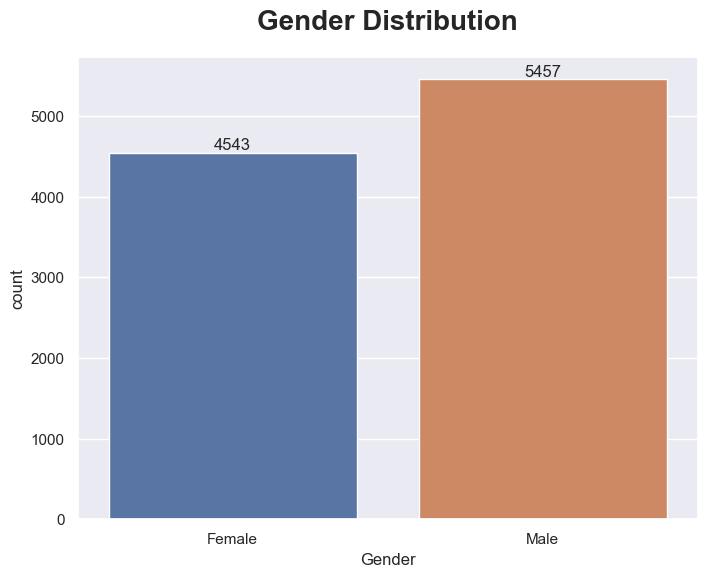

In [20]:
sns.set(style='darkgrid')

# Plotting the barplot
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Gender', data=df1)
plt.title('Gender Distribution',fontweight='bold',pad=20,fontsize=20)

# Adding value labels on scroll
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.show()

# Key Insight
- The majority of customers are `Male`.

### This code generates a bar chart to visualize the count of customers by country.

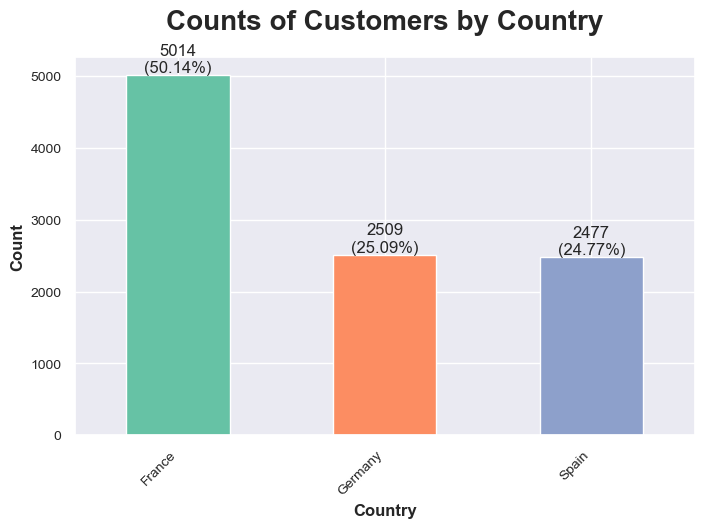

In [21]:
# Get the count of customers by country
count_values = df1['Country'].value_counts()

# Calculate total count
total = count_values.sum()

# Set the style and color palette
sns.set_style("darkgrid")
color_palette = sns.color_palette("Set2")

# Create the figure and axis with larger figsize
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the bar chart
count_values.plot(kind='bar', color=color_palette, ax=ax)

# Add labels and percentages to the bars
for i, v in enumerate(count_values):
    percentage = (v / total) * 100
    ax.annotate(f"{v}\n({percentage:.2f}%)", (i, v), ha='center', va='bottom', fontsize=12)

# Set the x and y axis labels and title
ax.set_xlabel('Country', fontsize=12,fontweight='bold')
ax.set_ylabel('Count', fontsize=12,fontweight='bold')
ax.set_title('Counts of Customers by Country',fontweight='bold',pad=20,fontsize=20)

# Customize the x-axis tick labels
ax.set_xticklabels(count_values.index, rotation=45, ha='right', fontsize=10)

# Set the font size of y-axis tick labels
ax.tick_params(axis='y', labelsize=10)

# Adjust the spacing between subplots
plt.subplots_adjust(bottom=0.25)

# Show the plot
plt.show()

# Key Insight
- Half of the Bank's customers reside in `France`.

### This code generates a bar chart to visualize the counts of churned status.

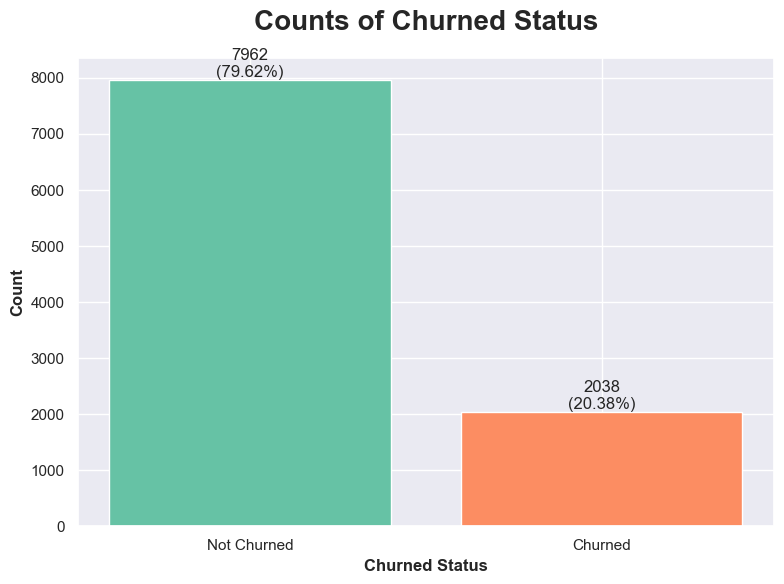

In [22]:
churned_status_count = df1['Churned Status'].value_counts()

# Set the style and color palette
sns.set_style("darkgrid")
color_palette = sns.color_palette("Set2")

# Create the figure and axis with desired figsize
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the bar chart
plt.bar(churned_status_count.index.astype(str), churned_status_count.values, color=color_palette)

# Add labels and percentages to the bars
for i, v in enumerate(churned_status_count.values):
    percentage = (v / churned_status_count.sum()) * 100
    ax.annotate(f"{v}\n({percentage:.2f}%)", xy=(i, v), ha='center', va='bottom', fontsize=12)

# Set the x and y axis labels and title
plt.xlabel('Churned Status', fontsize=12,fontweight='bold')
plt.ylabel('Count', fontsize=12,fontweight='bold')
plt.title('Counts of Churned Status',fontweight='bold',pad=20,fontsize=20)

plt.tight_layout()

# Show the plot
plt.show()

# Key Insight
- Approximately `80%` of the bank's customers have stayed with the bank without attrition.

### This code is plotting a bar chart to show the number of customers who have 'Exited' in France, using the 'Churned Status' column of the data.

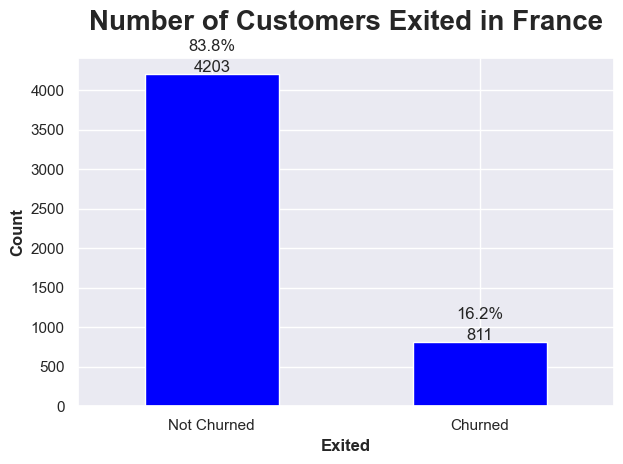

In [23]:
# Grouping the data by 'Churned Status' and counting the values
france_exited_count = df1[df1['Country'] == 'France']['Churned Status'].value_counts()

# Define the figure and axes
fig, ax = plt.subplots()

# Plotting the bar plot
france_exited_count.plot(kind='bar', color='blue', ax=ax)

# Formatting the plot
plt.xlabel('Exited',fontweight='bold')
plt.ylabel('Count',fontweight='bold')
plt.title('Number of Customers Exited in France',fontweight='bold',pad=20,fontsize=20)
plt.xticks(rotation=0)

# Creating a function to display the values on top of each bar
def add_value_labels(ax):
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(format(height, '.0f'), (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', xytext=(0, 5),
                    textcoords='offset points')

# Add the values on top of each bar
add_value_labels(ax)

# Show the percentage on top of each bar
total_count = france_exited_count.sum()
for p in ax.patches:
    height = p.get_height()
    percentage = '{:.1f}%'.format(100 * height / total_count)
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center',
                xytext=(0, 20 if height >= total_count * 0.03 else 5),
                textcoords='offset points')

# Show the plot
plt.tight_layout()
plt.show()

### This code is grouping the data by 'Gender' and 'Churned Status' for customers in France, and then plotting a bar chart to show the counts of churned customers for each gender. 

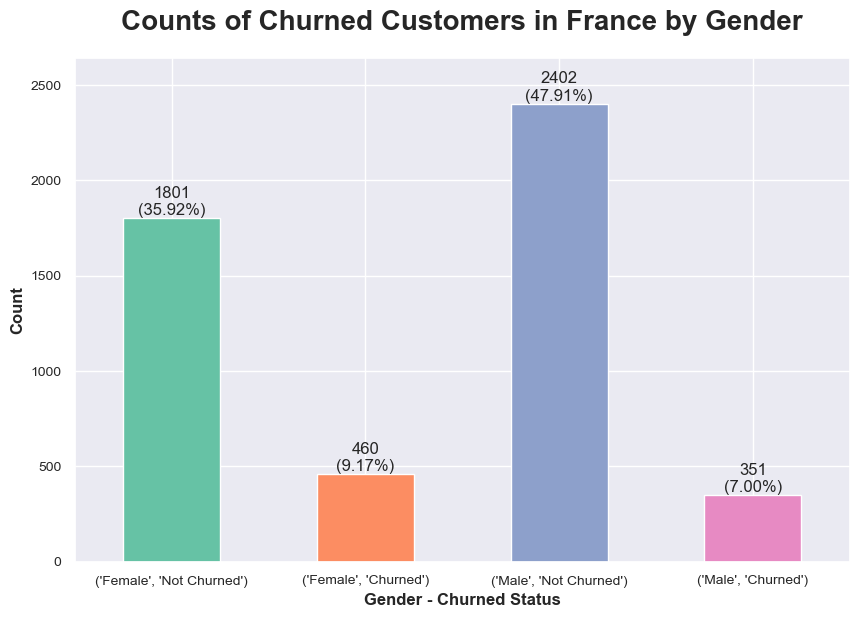

In [24]:
france_gender_churned_count = df1[df1['Country'] == 'France'].groupby('Gender')['Churned Status'].value_counts()

# Calculate the total count
total = france_gender_churned_count.sum()

# Set the style and color palette
sns.set_style("darkgrid")
color_palette = sns.color_palette("Set2")

# Create the figure and axis with larger figsize
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the bar chart
france_gender_churned_count.plot(kind='bar', color=color_palette)

# Add labels and percentages to the bars
for i, v in enumerate(france_gender_churned_count.values):
    percentage = (v / total) * 100
    ax.annotate(f"{v}\n({percentage:.2f}%)", (i, v), ha='center', va='bottom', fontsize=12)

# Set the x and y axis labels and title
ax.set_xlabel('Gender - Churned Status', fontsize=12,fontweight='bold')
ax.set_ylabel('Count', fontsize=12,fontweight='bold')
ax.set_title('Counts of Churned Customers in France by Gender',fontweight='bold',pad=20,fontsize=20)

# Customize the x-axis tick labels
ax.set_xticklabels(france_gender_churned_count.index, rotation=0, fontsize=10)

# Set the font size of y-axis tick labels
ax.tick_params(axis='y', labelsize=10)

# Adjust the spacing between subplots
plt.subplots_adjust(bottom=0.25)

# Adjust the y-axis limits
plt.ylim(top=max(france_gender_churned_count.values)*1.1)

# Show the plot
plt.show()

# Key Insight
- Half of the customer are `male` and they did not churned

### This code filters the data for customers in Spain and calculates the counts of churned customers. It then plots a bar chart to show the counts of churned customers in Spain. 

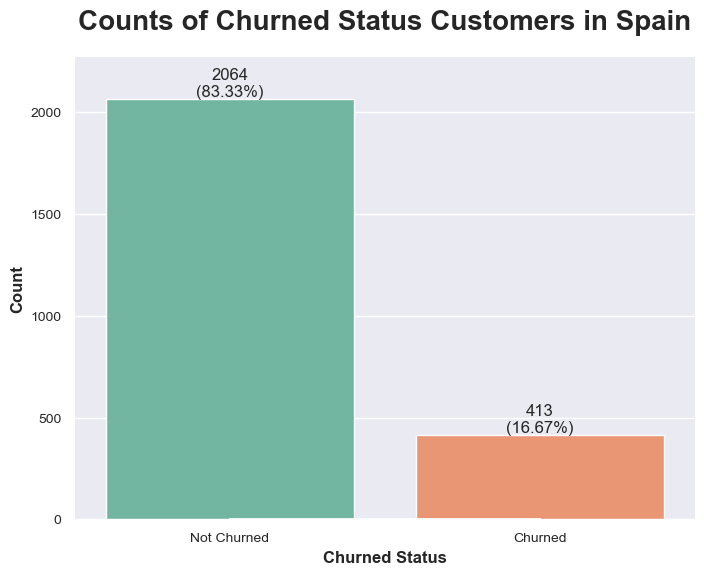

In [25]:
# Filter the data for Spain and calculate the churned counts
spain_exited_count = df1[df1['Country'] == 'Spain']['Churned Status'].value_counts()

# Calculate the total count
total = spain_exited_count.sum()

# Set the style and color palette
sns.set_style("darkgrid")
color_palette = sns.color_palette("Set2")

# Create the figure and axis with larger figsize
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the bar chart
sns.barplot(x=spain_exited_count.index.astype(str), y=spain_exited_count.values, palette=color_palette)

# Add labels and percentages to the bars
for i, v in enumerate(spain_exited_count.values):
    percentage = (v / total) * 100
    ax.annotate(f"{v}\n({percentage:.2f}%)", (i, v), ha='center', va='bottom', fontsize=12)

# Set the x and y axis labels and title
plt.xlabel('Churned Status', fontsize=12,fontweight='bold')
plt.ylabel('Count', fontsize=12,fontweight='bold')
plt.title('Counts of Churned Status Customers in Spain',fontweight='bold',pad=20,fontsize=20)

# Customize the font size and color of x and y axis labels
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Adjust the y-axis limits
plt.ylim(top=max(spain_exited_count.values) * 1.1)

# Remove the top and right spines of the plot
sns.despine(trim=True, left=True)

# Show the plot
plt.show()

### This code filters the data for customers in Spain and groups them by 'Gender' and 'Churned Status'. It then plots a bar chart to show the counts of churned customers in Spain for each gender. 

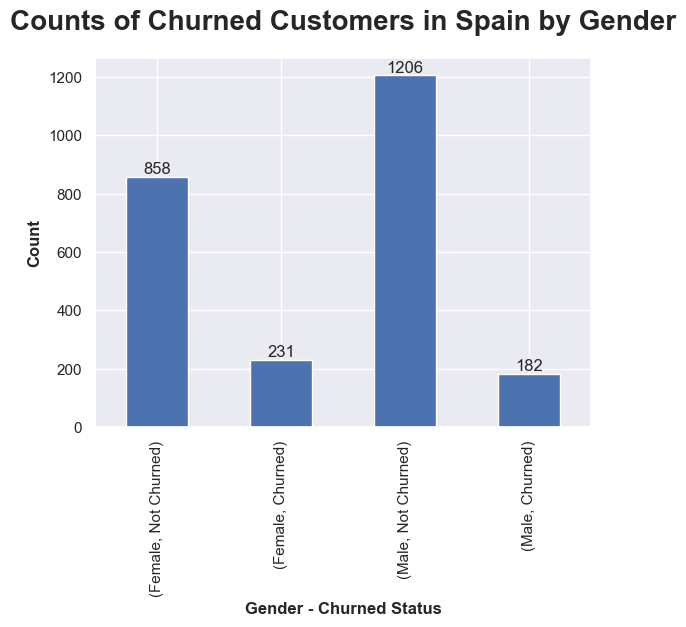

In [26]:
spain_gender_churned_count = df1[df1['Country'] == 'Spain'].groupby('Gender')['Churned Status'].value_counts()

spain_gender_churned_count.plot(kind='bar')

for i, v in enumerate(spain_gender_churned_count.values):
    plt.annotate(str(v), xy=(i, v), ha='center', va='bottom')

plt.xlabel('Gender - Churned Status',fontweight='bold')
plt.ylabel('Count',fontweight='bold')
plt.title('Counts of Churned Customers in Spain by Gender',fontweight='bold',pad=20,fontsize=20)

plt.show()

### This code filters the data for customers in Germany and calculates the counts of churned customers. It then plots a bar chart to display the counts of churned customers in Germany. 

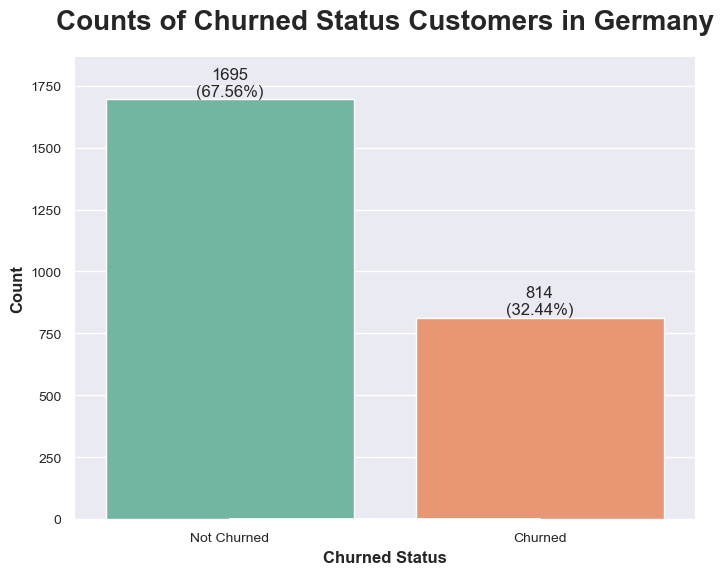

In [27]:
# Filter the data for Germany and calculate the churned counts
germany_exited_count = df1[df1['Country'] == 'Germany']['Churned Status'].value_counts()

# Calculate the total count
total = germany_exited_count.sum()

# Set the style and color palette
sns.set_style("darkgrid")
color_palette = sns.color_palette("Set2")

# Create the figure and axis with larger figsize
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the bar chart using seaborn's barplot function
sns.barplot(x=germany_exited_count.index.astype(str), y=germany_exited_count.values, palette=color_palette)

# Add labels and percentages to the bars
for i, v in enumerate(germany_exited_count.values):
    percentage = (v / total) * 100
    ax.annotate(f"{v}\n({percentage:.2f}%)", (i, v), ha='center', va='bottom', fontsize=12)

# Set the x and y axis labels and title
plt.xlabel('Churned Status', fontsize=12,fontweight='bold')
plt.ylabel('Count', fontsize=12,fontweight='bold')
plt.title('Counts of Churned Status Customers in Germany',fontweight='bold',pad=20,fontsize=20)

# Customize the font size and color of x and y axis labels
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Adjust the y-axis limits
plt.ylim(top=max(germany_exited_count.values) * 1.1)

# Remove the top and right spines of the plot
sns.despine(trim=True, left=True)

# Show the plot
plt.show()

### This code retrieves the churned count by gender for customers in Germany. 

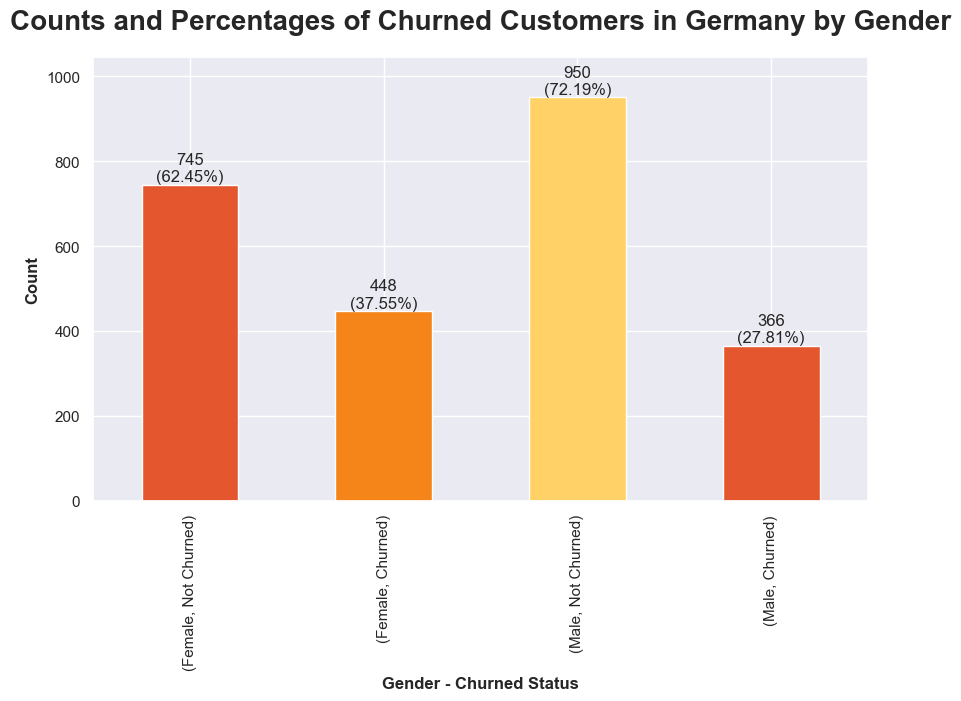

In [28]:
import mplcursors

# Get the churned count by gender
germany_gender_churned_count = df1[df1['Country'] == 'Germany'].groupby('Gender')['Churned Status'].value_counts()

# Calculate the percentages
germany_gender_churned_percent = germany_gender_churned_count.groupby(level=0).apply(lambda x: x / float(x.sum()) * 100)

# Set custom colors
colors = ['#E4572E', '#F58518', '#FFD166']

# Set figure size
plt.figure(figsize=(10, 6))

# Plot the bar chart
germany_gender_churned_count.plot(kind='bar', color=colors)

for i, (count, percent) in enumerate(zip(germany_gender_churned_count.values, germany_gender_churned_percent.values)):
    # Annotate with count and percentage values
    plt.annotate(f"{count}\n({percent:.2f}%)", xy=(i, count), ha='center', va='bottom')

# Set x and y axis labels
plt.xlabel('Gender - Churned Status',fontweight='bold')
plt.ylabel('Count',fontweight='bold')
plt.title('Counts and Percentages of Churned Customers in Germany by Gender',fontweight='bold',pad=20,fontsize=20)

# Set custom style for cursor hover
cursor = mplcursors.cursor(hover=True)
cursor.connect("add", lambda sel: sel.annotation.set_text(f"{sel.target.get_height()}\n({germany_gender_churned_percent.iloc[sel.target.get_x()]:.2f}%)"))

# Adjust y-axis limits and spacing
plt.ylim(top=max(germany_gender_churned_count.values) * 1.1)
plt.subplots_adjust(top=0.85)

plt.show()

### This code groups the data by 'Country' and calculates the mean of the 'CreditScore' column for each .

In [29]:
df1.pivot_table(index='Country', values='CreditScore', aggfunc='mean')

CreditScore
Country             
France    649.668329
Germany   651.453567
Spain     651.333872

### This code calculates the mean credit score for each country in the dataset and then plots a bar chart to show the mean credit score by country.

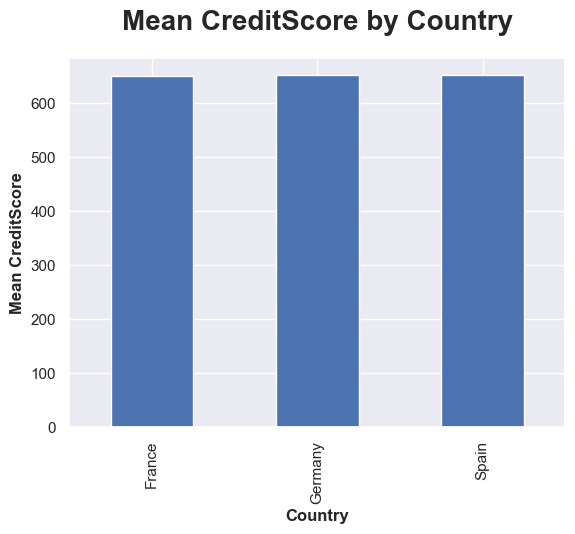

In [30]:
geography_credit_mean = df1.groupby('Country')['CreditScore'].mean()

geography_credit_mean.plot(kind='bar')
plt.xlabel('Country',fontweight='bold')
plt.ylabel('Mean CreditScore',fontweight='bold')
plt.title('Mean CreditScore by Country',fontweight='bold',pad=20,fontsize=20)
plt.show()

# Key Insight
- All the country's average credit scores are equal

### This code maps the values in the 'HasCrCard' column of the dataframe to 'Yes' if the value is 1 and 'No' if the value is 0.

In [31]:
#Map HasCrCard column to Owned and Not Owned
map_dict1 = {
    1: 'Yes',
    0: 'No'
}
df1['HasCrCard'] = df1['HasCrCard'].map(map_dict1)

### This code generates a bar chart showing the count and percentage of customers with a credit card.

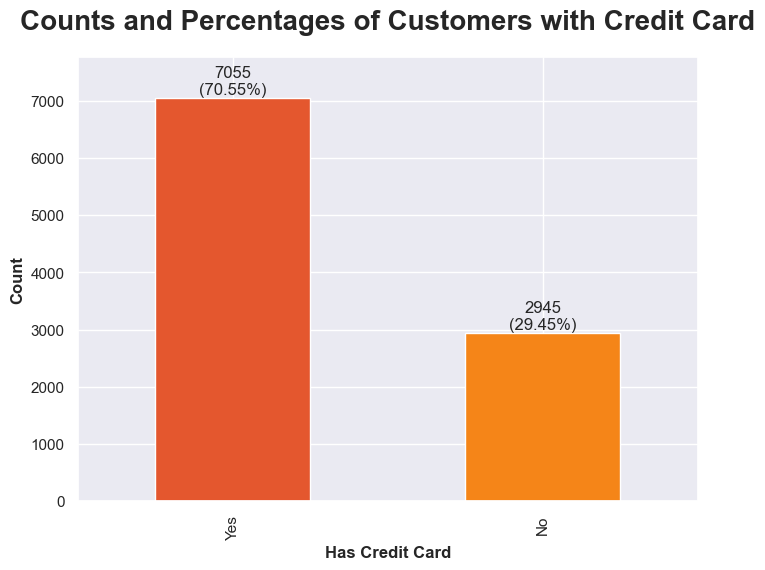

In [32]:
# Get the count of customers with credit card
has_cr_card_count = df1['HasCrCard'].value_counts()

# Calculate the percentages
has_cr_card_percent = has_cr_card_count / has_cr_card_count.sum() * 100

# Set custom colors
colors = ['#E4572E', '#F58518']

# Set figure size
plt.figure(figsize=(8, 6))

# Plot the bar chart
has_cr_card_count.plot(kind='bar', color=colors)

for i, (count, percent) in enumerate(zip(has_cr_card_count, has_cr_card_percent)):
    # Annotate with count and percentage values
    plt.annotate(f"{count}\n({percent:.2f}%)", xy=(i, count), ha='center', va='bottom')

# Set x and y axis labels
plt.xlabel('Has Credit Card',fontweight='bold')
plt.ylabel('Count',fontweight='bold')
plt.title('Counts and Percentages of Customers with Credit Card',fontweight='bold',pad=20,fontsize=20)

# Set custom style for cursor hover
cursor = mplcursors.cursor(hover=True)
cursor.connect("add", lambda sel: sel.annotation.set_text(f"{sel.target.get_height()}\n({has_cr_card_percent.iloc[sel.target.get_x()]:.2f}%)"))

# Adjust y-axis limits and spacing
plt.ylim(top=max(has_cr_card_count) * 1.1)
plt.subplots_adjust(top=0.85)

plt.show()

# Key Insight
- Almost `80%` of customers have a credit card, indicating a widespread adoption of credit card usage.

### This code groups the data by gender and credit card status, and then creates a bar chart showing the count of customers with a credit card for each gender. 

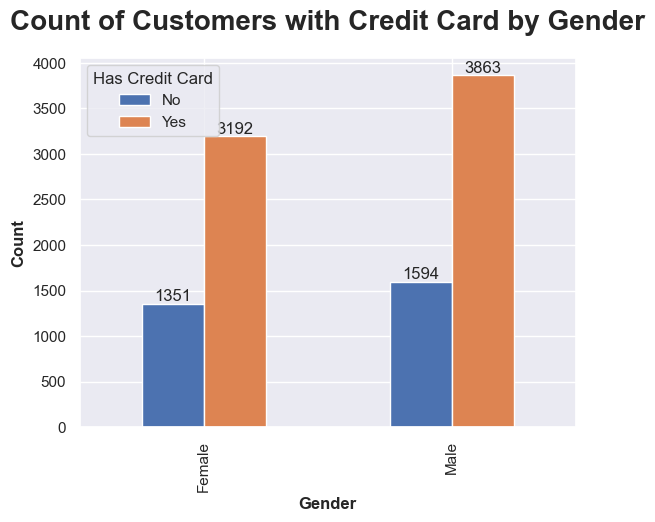

In [33]:
gender_has_cr_card_count = df1.groupby('Gender')['HasCrCard'].value_counts()

ax = gender_has_cr_card_count.unstack().plot(kind='bar')

for container in ax.containers:
    ax.bar_label(container)

plt.xlabel('Gender',fontweight='bold')
plt.ylabel('Count',fontweight='bold')
plt.title('Count of Customers with Credit Card by Gender',fontweight='bold',pad=20,fontsize=20)
plt.legend(title='Has Credit Card')

plt.show()

### This code groups the data by country and credit card status, and then creates a bar chart showing the count of customers with a credit card for each country.

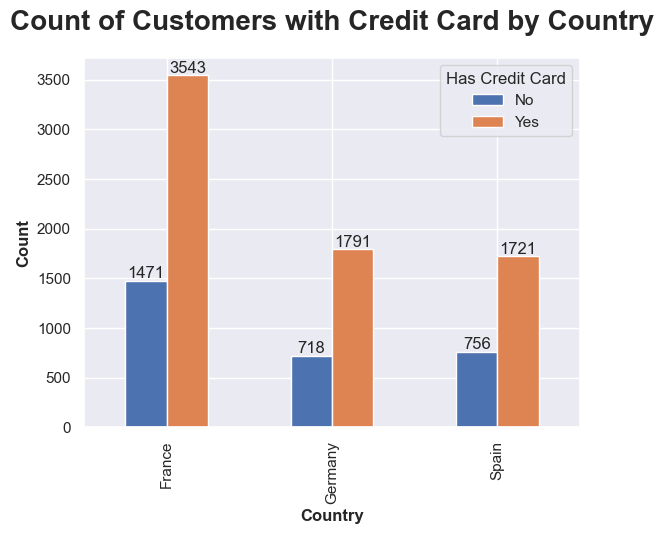

In [34]:
geography_has_cr_card_count = df1.groupby('Country')['HasCrCard'].value_counts()
# Code to generate the bar plot
geography_has_cr_card_count.unstack().plot(kind='bar')
plt.xlabel('Country',fontweight='bold')
plt.ylabel('Count',fontweight='bold')
plt.title('Count of Customers with Credit Card by Country',fontweight='bold',pad=20,fontsize=20)
plt.legend(title='Has Credit Card')

# Code to show the exact value when scrolling the cursor
ax = plt.gca()
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.show()

# Key Insight
- `French` customers have the highest credit card adoption rate among all countries.

### This code groups the data by both country, gender, and credit card status, and creates a bar chart showing the count of customers with a credit card for each combination of country and gender. 

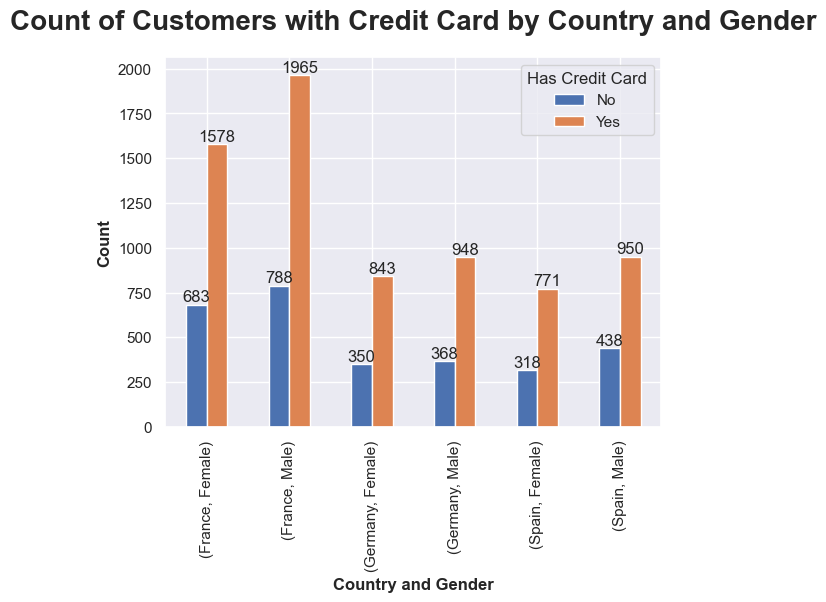

In [35]:
geography_gender_has_cr_card_count = df1.groupby(['Country', 'Gender'])['HasCrCard'].value_counts()

# Code to generate the bar plot
geography_gender_has_cr_card_count.unstack().plot(kind='bar')
plt.xlabel('Country and Gender',fontweight='bold')
plt.ylabel('Count',fontweight='bold')
plt.title('Count of Customers with Credit Card by Country and Gender',fontweight='bold',pad=20,fontsize=20)
plt.legend(title='Has Credit Card')

# Code to show the exact value when scrolling the cursor
ax = plt.gca()
for container in ax.containers:
    for p in container.patches:
        ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.show()

### This code groups the data by credit card status and churned status, and creates a bar chart showing the count of customers' churned status for each credit card status.

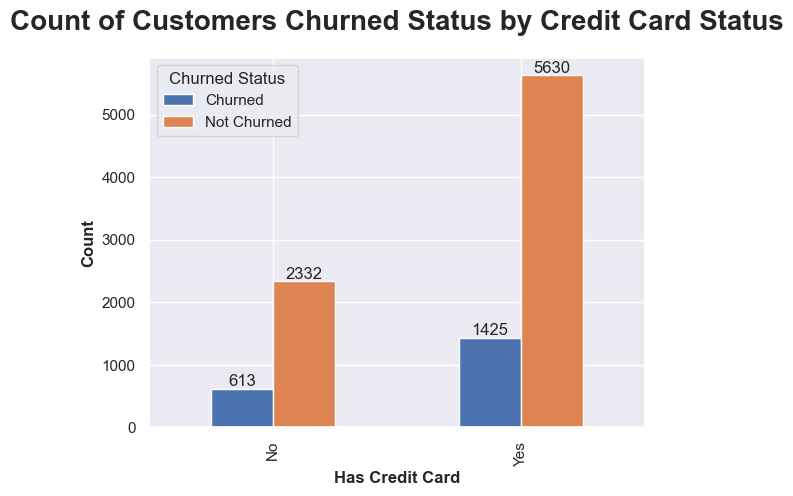

In [36]:
has_cr_card_exited_count = df1.groupby('HasCrCard')['Churned Status'].value_counts()

# Code to generate the bar plot
has_cr_card_exited_count.unstack().plot(kind='bar')
plt.xlabel('Has Credit Card',fontweight='bold')
plt.ylabel('Count',fontweight='bold')
plt.title('Count of Customers Churned Status by Credit Card Status',fontweight='bold',pad=20,fontsize=20)
plt.legend(title='Churned Status')

# Code to show the exact value when scrolling the cursor
ax = plt.gca()
for container in ax.containers:
    for p in container.patches:
        ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.show()

# Key Insight
- The graph indicates that customers who have a credit card have low churn probability.

### This code groups the data by country, credit card status, gender, and churned status, and creates a pivot table showing the count of customers' churned status for each combination of country, credit card status, and gender.

In [37]:
pivot_table = df1.groupby(['Country', 'HasCrCard', 'Gender'])['Churned Status'].value_counts().unstack()
pivot_table = pivot_table.reset_index()
pivot_table

Churned Status  Country HasCrCard  Gender  Churned  Not Churned
0                France        No  Female      139          544
1                France        No    Male      102          686
2                France       Yes  Female      321         1257
3                France       Yes    Male      249         1716
4               Germany        No  Female      131          219
5               Germany        No    Male      106          262
6               Germany       Yes  Female      317          526
7               Germany       Yes    Male      260          688
8                 Spain        No  Female       74          244
9                 Spain        No    Male       61          377
10                Spain       Yes  Female      157          614
11                Spain       Yes    Male      121          829

### This code renames the column 'IsActiveMember' to 'Activity Status' . It then maps the values in the 'Activity Status' column to 'Active' for a value of 1 and 'Not Active' for a value of 0 .

In [38]:
#renaming the column IsActiveMember to Activity Status
df1.rename(columns={
    'IsActiveMember': 'Activity Status'
}, inplace=True)



# Map Activity Status to Active and Inactive
dict2 = {
    1: 'Active',
    0: 'Not Active'
}

df1['Activity Status'] = df1['Activity Status'].map(dict2)

### This code calculates the count and percentage of customers with activity status ('Activity Status') in the dataframe 'df1'. It then creates a bar chart to visualize the count and percentage. 

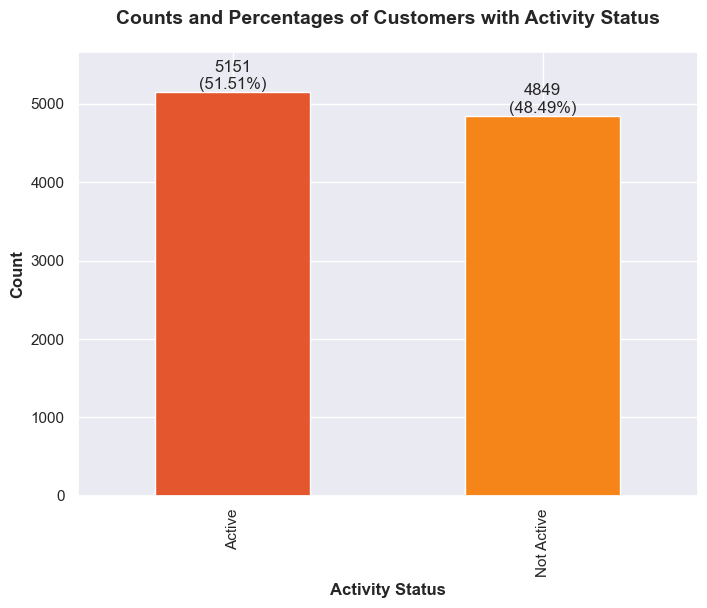

In [39]:
# Calculate the count and percentage of customers with credit card
activity_status_count = df1['Activity Status'].value_counts()
activity_status_percent = activity_status_count / activity_status_count.sum() * 100

# Set custom colors
colors = ['#E4572E', '#F58518']

# Set figure size
plt.figure(figsize=(8, 6))

# Plot the bar chart
ax = activity_status_count.plot(kind='bar', color=colors)

for i, (count, percent) in enumerate(zip(activity_status_count, activity_status_percent)):
    # Annotate with count and percentage values
    ax.annotate(f"{count}\n({percent:.2f}%)", xy=(i, count), ha='center', va='bottom')

# Set x and y axis labels
ax.set_xlabel('Activity Status', fontsize=12,fontweight='bold')
ax.set_ylabel('Count', fontsize=12,fontweight='bold')
ax.set_title('Counts and Percentages of Customers with Activity Status', fontsize=14,fontweight='bold',pad=20)

# Set custom style for cursor hover
cursor = mplcursors.cursor(hover=True)
cursor.connect("add", lambda sel: sel.annotation.set_text(f"{sel.target.get_height()}\n({activity_status_percent.iloc[sel.target.get_x()]:.2f}%)"))

# Set color palette
sns.set_palette(colors)

# Adjust y-axis limits and spacing
plt.ylim(top=max(activity_status_count) * 1.1)
plt.subplots_adjust(top=0.85)

plt.show()

### This code groups the data by activity status and churned status, and creates a bar chart showing the count of customers' churned status for each activity status. 

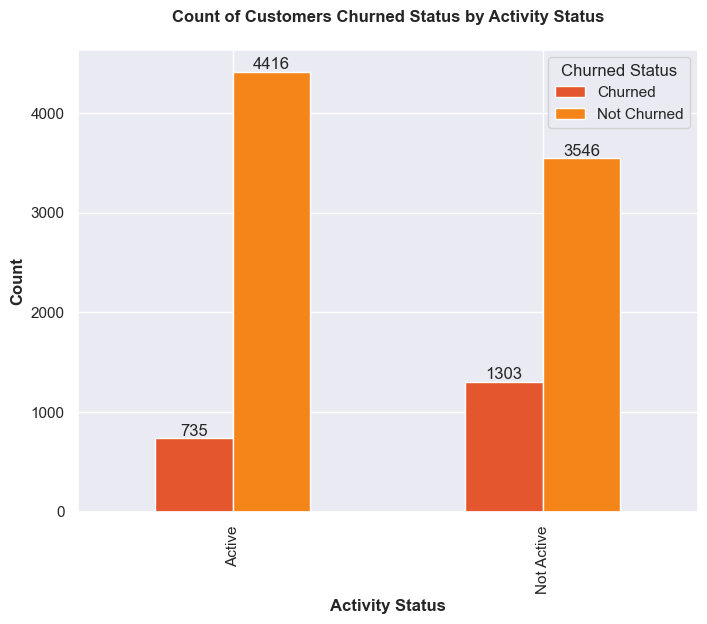

In [40]:
is_active_member_exited_count = df1.groupby('Activity Status')['Churned Status'].value_counts()
ax = is_active_member_exited_count.unstack().plot(kind='bar', figsize=(8, 6))

ax.set_xlabel('Activity Status',fontweight='bold')
ax.set_ylabel('Count',fontweight='bold')
ax.set_title('Count of Customers Churned Status by Activity Status',fontweight='bold',pad=20)
ax.legend(title='Churned Status')

# Annotate the value above each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2, p.get_height()), ha = 'center', va = 'bottom')

plt.show()

### This code groups the data by country, activity status, and churned status, and creates a bar chart showing the count of customers' churned status for each combination of country and activity status. 

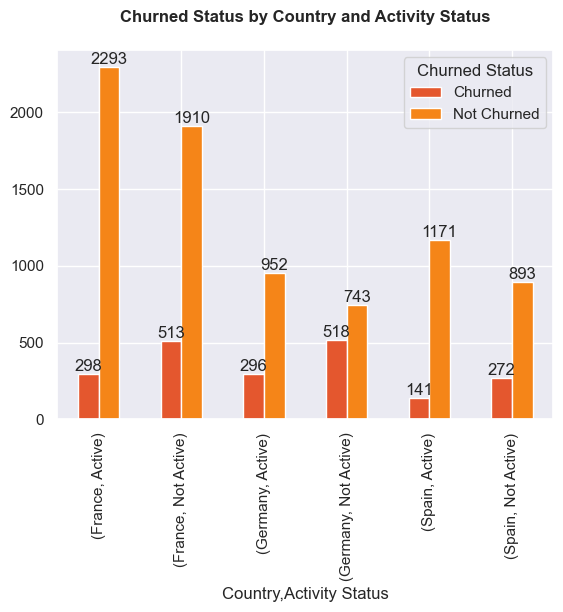

In [41]:
# Code to generate the bar plot
df1.groupby(['Country', 'Activity Status'])['Churned Status'].value_counts().unstack().plot(kind='bar')

# Code to show the exact value when scrolling the cursor
ax = plt.gca()
for container in ax.containers:
    for p in container.patches:
        ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.title("Churned Status by Country and Activity Status",fontweight='bold',pad=20)
plt.show()

# Key Insight
- This graph highlights the correlation between customer activity and churn rate. It indicates that customers who are more active have a lower likelihood of churning from the bank. The bank can leverage this insight to prioritize and focus on retaining these active customers more effectively.

### This code groups the data by activity status, credit card status, and churned status, and creates a bar chart showing the count of customers' churned status for each combination of activity status and credit card status.

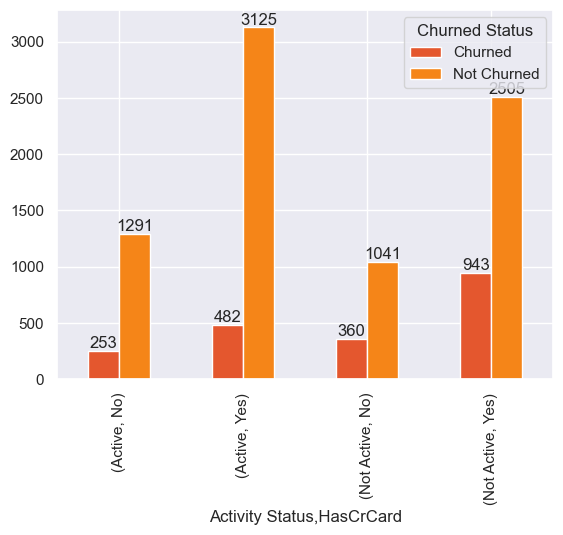

In [42]:
# Code to generate the bar plot
df1.groupby(['Activity Status', 'HasCrCard'])['Churned Status'].value_counts().unstack().plot(kind='bar')

# Code to show the exact value when scrolling the cursor
ax = plt.gca()
for container in ax.containers:
    for p in container.patches:
        ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.show()

# Key Insight
- This graph emphasizes the significance of the combination of credit card ownership and customer activity in relation to churn rate. It indicates that customers who not only possess a credit card but are also active exhibit a substantially lower probability of churning from the bank. This data underscores the importance for the bank to give special attention to these customers, as they represent a valuable segment that is less likely to leave.

### This code groups the data by country, gender, activity status, credit card status, and churned status, and creates a pivot table showing the count of customers' churned status for each combination of these variables.

In [43]:
pivot_table = df1.groupby(['Country', 'Gender', 'Activity Status', 'HasCrCard'])['Churned Status'].value_counts().unstack(fill_value=0)
pivot_table = pivot_table.reset_index()
pivot_table.columns.name = None
pivot_table

Country  Gender Activity Status HasCrCard  Churned  Not Churned
0    France  Female          Active        No       59          293
1    France  Female          Active       Yes      113          697
2    France  Female      Not Active        No       80          251
3    France  Female      Not Active       Yes      208          560
4    France    Male          Active        No       44          369
5    France    Male          Active       Yes       82          934
6    France    Male      Not Active        No       58          317
7    France    Male      Not Active       Yes      167          782
8   Germany  Female          Active        No       53          123
9   Germany  Female          Active       Yes      112          271
10  Germany  Female      Not Active        No       78           96
11  Germany  Female      Not Active       Yes      205          255
12  Germany    Male          Active        No       44          155
13  Germany    Male          Active       Yes       87          403
14  Germany    Male      Not Active        No       62          107
15  Germany    Male      Not Active       Yes      173          285
16    Spain  Female          Active        No       30          139
17    Spain  Female          Active       Yes       47          347
18    Spain  Female      Not Active        No       44          105
19    Spain  Female      Not Active       Yes      110          267
20    Spain    Male          Active        No       23          212
21    Spain    Male          Active       Yes       41          473
22    Spain    Male      Not Active        No       38          165
23    Spain    Male      Not Active       Yes       80          356

### This code creates a bar chart showing the count of churned status for different combinations of country, gender, activity status, and whether a person has a credit card. 

<Figure size 2500x1800 with 0 Axes>

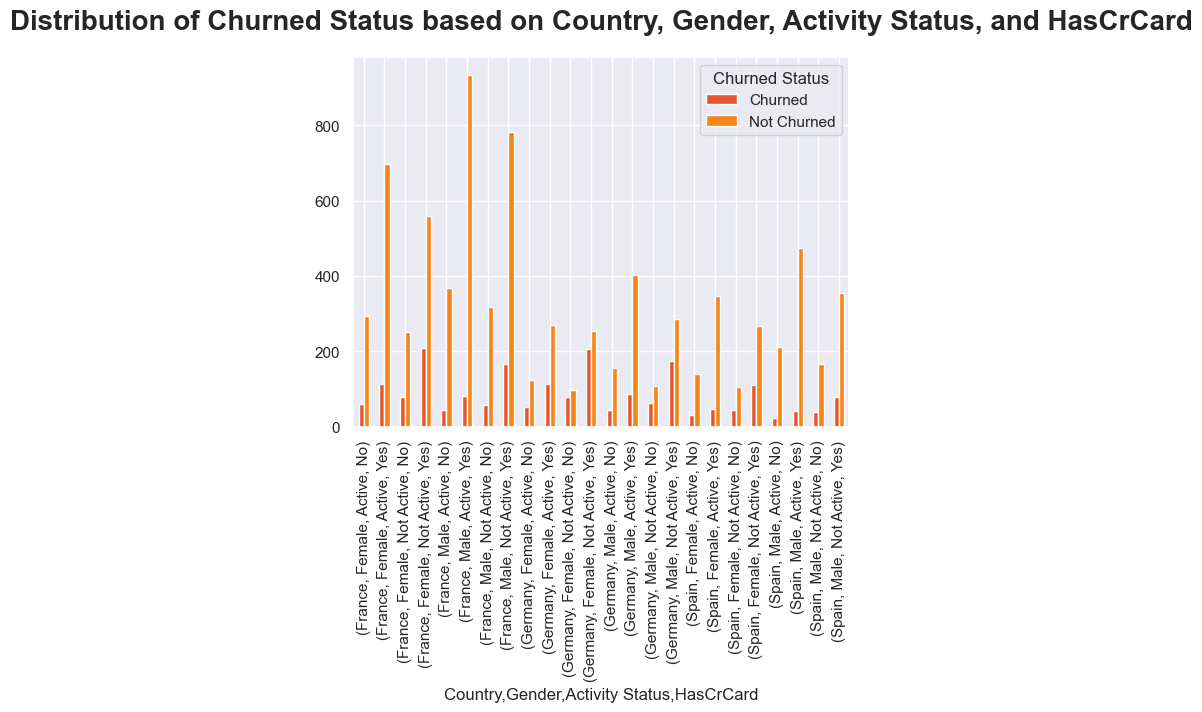

In [44]:
plt.figure(figsize=(25, 18)) # increase figsize

df1.groupby(['Country', 'Gender', 'Activity Status', 'HasCrCard'])['Churned Status'].value_counts().unstack().plot(kind='bar')
plt.title('Distribution of Churned Status based on Country, Gender, Activity Status, and HasCrCard',fontweight='bold',pad=20,fontsize=20)
plt.show()

### This code calculates the average estimated salary for each country in the dataset and then creates a bar plot using seaborn's barplot function. 

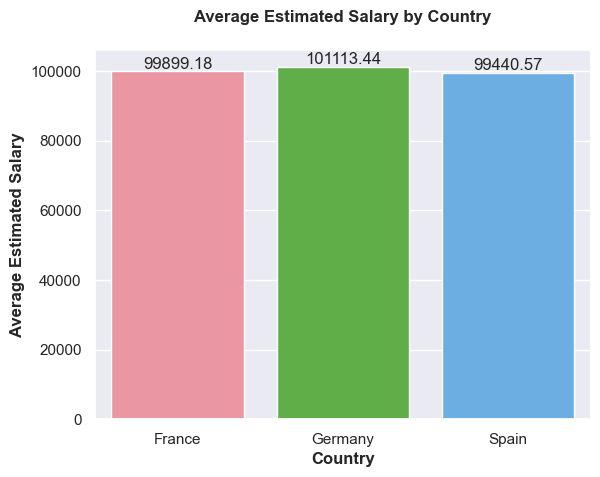

In [45]:
grouped_data = df1.groupby('Country')['EstimatedSalary'].mean().reset_index()

sns.barplot(x='Country', y='EstimatedSalary', data=grouped_data)

plt.title('Average Estimated Salary by Country',fontweight='bold',pad=20)
plt.xlabel('Country',fontweight='bold')
plt.ylabel('Average Estimated Salary',fontweight='bold')

# Annotate each bar with its value
for index, row in grouped_data.iterrows():
    plt.annotate(round(row['EstimatedSalary'], 2), 
                 xy=(index, row['EstimatedSalary']), 
                 ha='center', va='bottom')

plt.show()

### This code creates a pivot table using the DataFrame df1.

In [46]:
df1.pivot_table(values='EstimatedSalary', index='Country', columns='Gender', aggfunc='mean')

Gender          Female           Male
Country                              
France    99564.252755  100174.252495
Germany  102446.424124   99905.033959
Spain    100734.107475   98425.687680

### This code calculates the average estimated salary for each combination of country and gender in the dataset and then creates a bar plot using seaborn's barplot function.


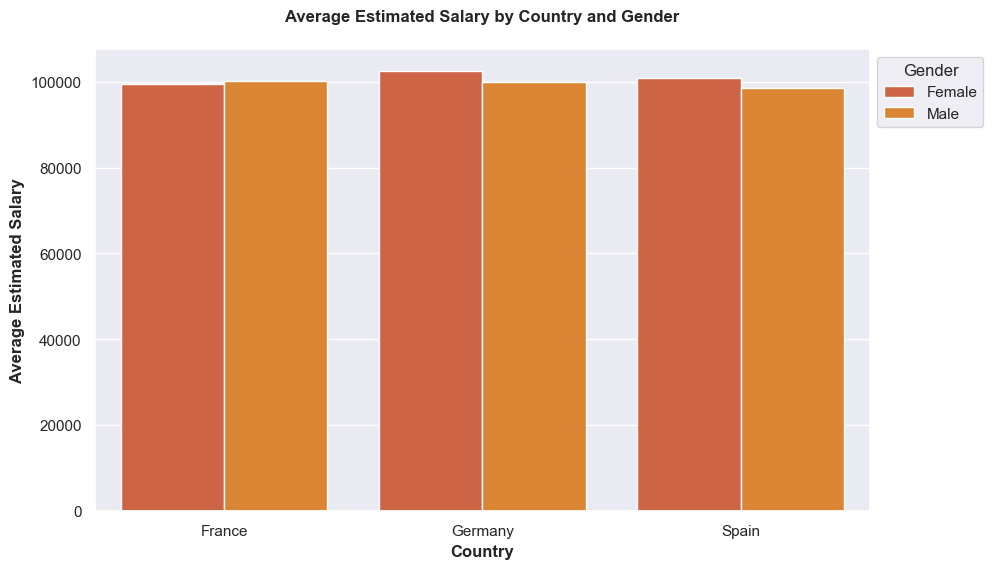

In [47]:
grouped_data = df1.groupby(['Country','Gender'])['EstimatedSalary'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Country', y='EstimatedSalary', hue='Gender', data=grouped_data)
plt.title('Average Estimated Salary by Country and Gender',fontweight='bold',pad=20)
plt.xlabel('Country',fontweight='bold')
plt.ylabel('Average Estimated Salary',fontweight='bold')
plt.legend(title='Gender', bbox_to_anchor=(1,1))
plt.show()

### This code creates a pivot table using the DataFrame df1

In [48]:
df1.pivot_table(values='EstimatedSalary', index='Country', columns='HasCrCard', aggfunc='mean')

HasCrCard             No            Yes
Country                                
France     100967.795629   99455.508109
Germany     99872.487103  101610.922909
Spain      102033.767394   98301.434858

### This code creates a pivot table using the DataFrame df1, with 'EstimatedSalary' as the values, 'Country' as the index, and 'HasCrCard' as the columns. The mean is calculated for each combination of country and whether a person has a credit card.


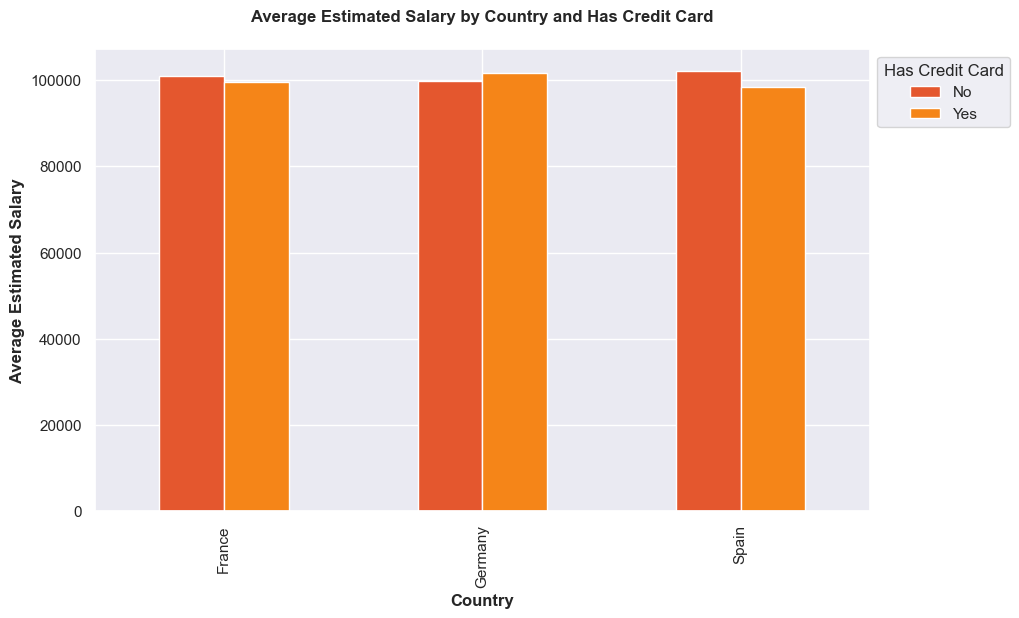

In [49]:
pivot_table = df1.pivot_table(values='EstimatedSalary', index='Country', columns='HasCrCard', aggfunc='mean')

pivot_table.plot(kind='bar', figsize=(10, 6))
plt.title('Average Estimated Salary by Country and Has Credit Card',fontweight='bold',pad=20)
plt.xlabel('Country',fontweight='bold')
plt.ylabel('Average Estimated Salary',fontweight='bold')
plt.legend(title='Has Credit Card', bbox_to_anchor=(1, 1))
plt.show()

### This code creates a pivot table using the DataFrame 'df1'.

In [50]:
df1.pivot_table(values='EstimatedSalary', index='Country', columns='Activity Status', aggfunc='mean')

Activity Status         Active     Not Active
Country                                      
France            98886.520560  100982.054408
Germany          100576.684006  101644.652680
Spain             99502.706486   99370.597966

### This code calculates the average estimated salary for each combination of country and activity status in the dataset and then creates a bar plot using seaborn's barplot function.

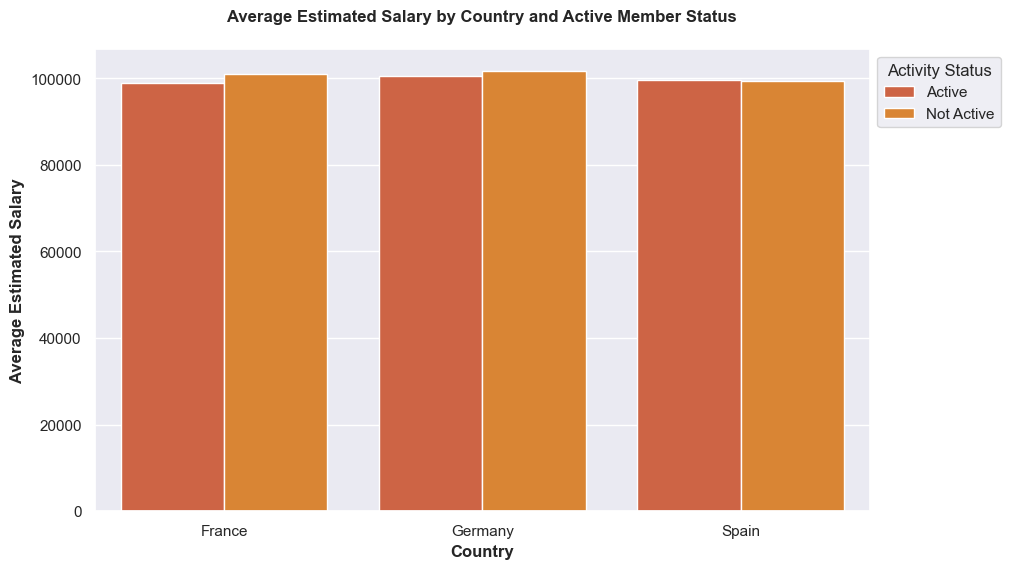

In [51]:
grouped_data = df1.groupby(['Country', 'Activity Status'])['EstimatedSalary'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Country', y='EstimatedSalary', hue='Activity Status', data=grouped_data)
plt.title('Average Estimated Salary by Country and Active Member Status',fontweight='bold',pad=20)
plt.xlabel('Country',fontweight='bold')
plt.ylabel('Average Estimated Salary',fontweight='bold')
plt.legend(title='Activity Status', bbox_to_anchor=(1, 1))
plt.show()

### This code calculates the average balance for each country in the dataset and then creates a bar plot using seaborn's barplot function.

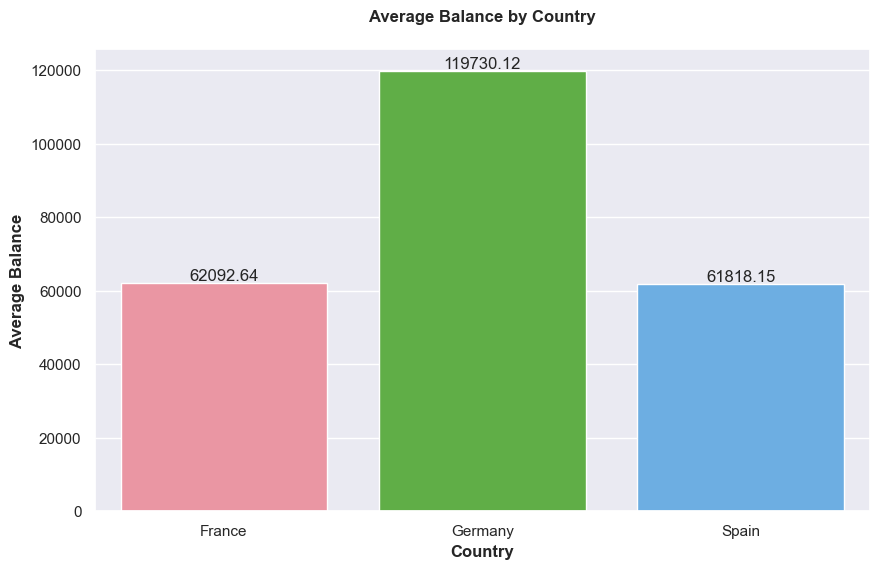

In [52]:
grouped_data = df1.groupby('Country')['Balance'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Country', y='Balance', data=grouped_data)
plt.title('Average Balance by Country',fontweight='bold',pad=20)
plt.xlabel('Country',fontweight='bold')
plt.ylabel('Average Balance',fontweight='bold')

# Annotate each bar with its value
for index, row in grouped_data.iterrows():
    plt.annotate(round(row['Balance'], 2), 
                 xy=(index, row['Balance']), 
                 ha='center', va='bottom')

plt.show()

# Key Insight
- Customers in `Germany` have the highest average balance.

### This code calculates the average balance for each combination of country and gender in the dataset and then creates a bar plot using seaborn's barplot function.

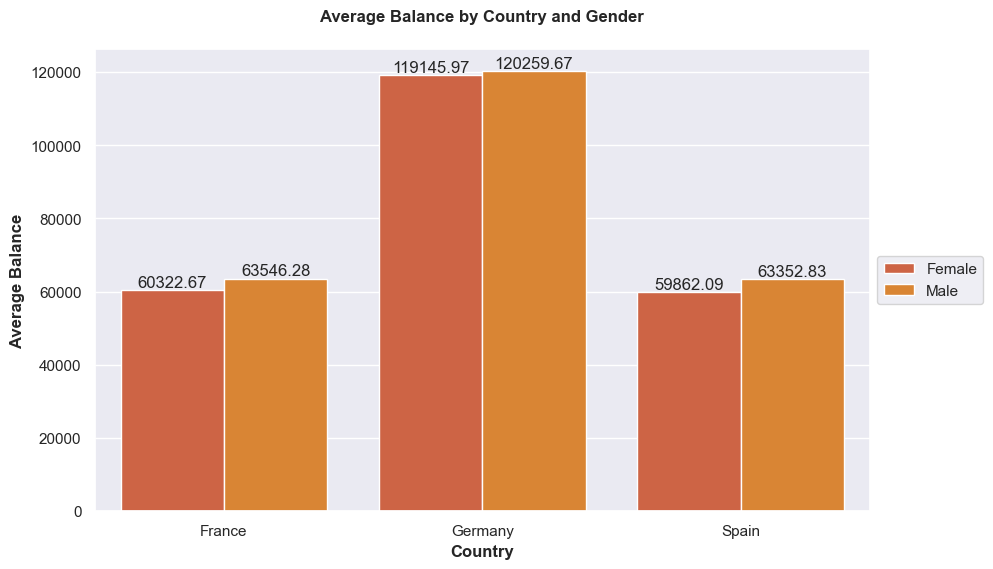

In [53]:
grouped_data = df1.groupby(['Country', 'Gender'])['Balance'].mean().reset_index()

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Country', y='Balance', hue='Gender', data=grouped_data)
plt.title('Average Balance by Country and Gender',fontweight='bold',pad=20)
plt.xlabel('Country',fontweight='bold')
plt.ylabel('Average Balance',fontweight='bold')

# Add value annotations to the bars
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2f}', (x + width/2, y + height), ha='center', va='bottom')

# Move the legend outside the plot
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

### This code calculates the average balance for each activity status category in the dataset and then creates a bar plot using seaborn's barplot function.


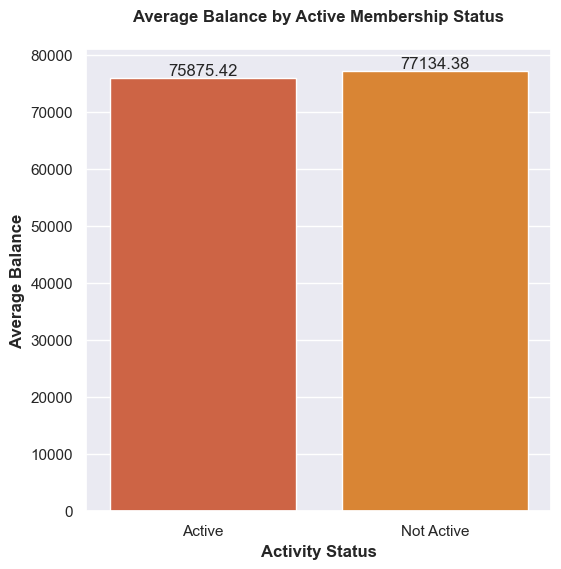

In [54]:
grouped_data = df1.groupby('Activity Status')['Balance'].mean().reset_index()

plt.figure(figsize=(6, 6))
sns.barplot(x='Activity Status', y='Balance', data=grouped_data)
plt.title('Average Balance by Active Membership Status',fontweight='bold',pad=20)
plt.xlabel('Activity Status',fontweight='bold')
plt.ylabel('Average Balance',fontweight='bold')

# Add value annotations to the bars
for i, row in grouped_data.iterrows():
    plt.annotate(round(row['Balance'], 2), xy=(i, row['Balance']), ha='center', va='bottom')

plt.show()

### This code calculates the average balance for each activity status category in the dataset and then creates a bar plot using seaborn's barplot function.

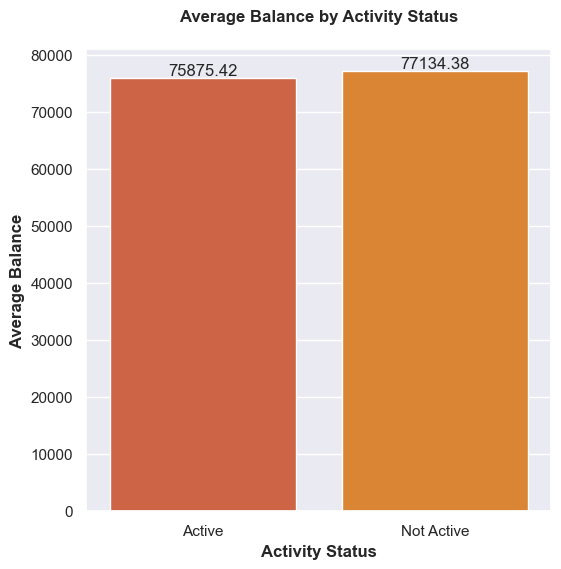

In [55]:
grouped_data = df1.groupby('Activity Status')['Balance'].mean().reset_index()

plt.figure(figsize=(6, 6))
sns.barplot(x='Activity Status', y='Balance', data=grouped_data)
plt.title('Average Balance by Activity Status',fontweight='bold',pad=20)
plt.xlabel('Activity Status',fontweight='bold')
plt.ylabel('Average Balance',fontweight='bold')

# Annotate each bar with its value
for index, row in grouped_data.iterrows():
    plt.annotate(round(row['Balance'], 2), 
                 xy=(index, row['Balance']), 
                 ha='center', va='bottom')

plt.show()

### This code calculates the average balance for each combination of activity status and gender in the dataset and then creates a bar plot using seaborn's barplot function.

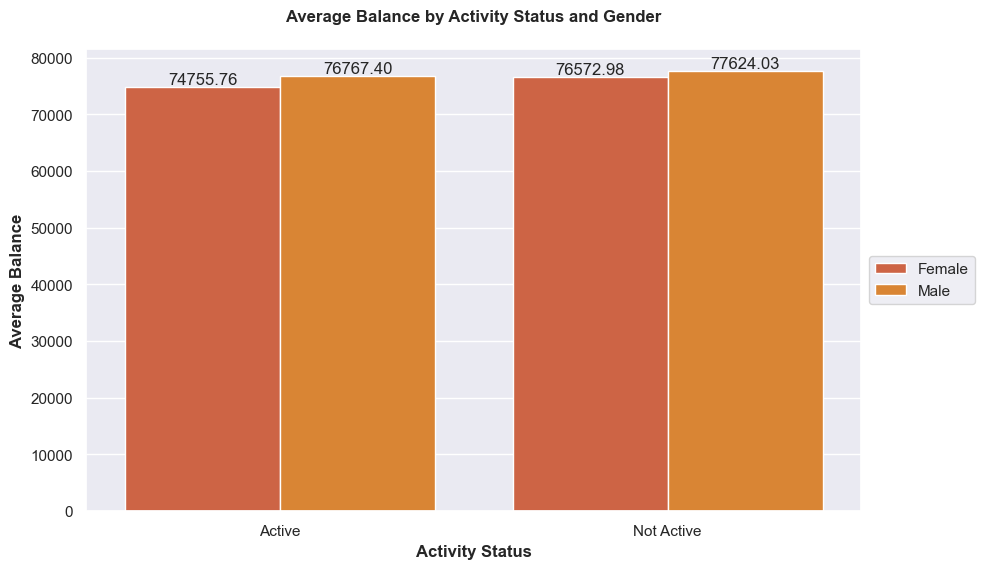

In [56]:
grouped_data = df1.groupby(['Activity Status', 'Gender'])['Balance'].mean().reset_index()

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Activity Status', y='Balance', hue='Gender', data=grouped_data)
plt.title('Average Balance by Activity Status and Gender',fontweight='bold',pad=20)
plt.xlabel('Activity Status',fontweight='bold')
plt.ylabel('Average Balance',fontweight='bold')

# Add value annotations to the bars
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2f}', (x + width/2, y + height), ha='center', va='bottom')

# Move the legend outside the plot
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

### This code creates a pivot table using the DataFrame df1.

In [57]:
df1.pivot_table(values='Balance', index='Country', columns='Activity Status', aggfunc='mean')

Activity Status         Active     Not Active
Country                                      
France            60810.588298   63463.576232
Germany          119874.607700  119587.114171
Spain             63773.288704   59616.306635

### This code is grouping the dataframe 'df1' by 'Country' and 'Activity Status' columns, calculating the mean of the 'Balance' column for each group, and then creating a bar plot to visualize the average balance for different countries and activity statuses.

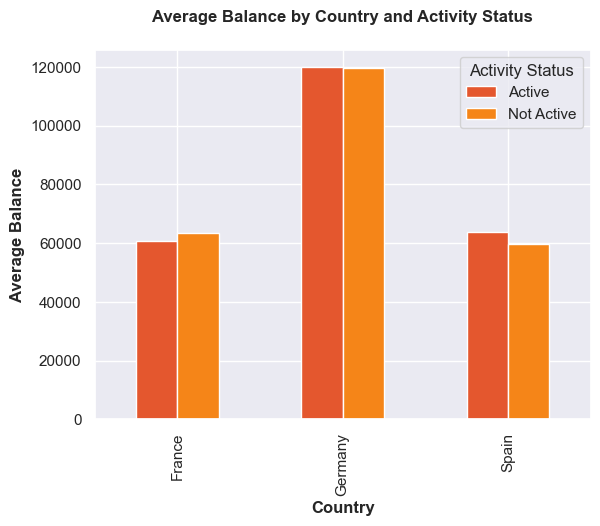

In [58]:
df1.groupby(['Country', 'Activity Status'])['Balance'].mean().unstack().plot(kind='bar')
plt.title('Average Balance by Country and Activity Status',fontweight='bold',pad=20)
plt.xlabel('Country',fontweight='bold')
plt.ylabel('Average Balance',fontweight='bold')
plt.legend(title='Activity Status', loc='best')
plt.show()

### This code is creating a bar chart to show the count of 'Active' and 'Not Active' individuals in the 'Activity Status' column of the dataframe 'df1', grouped by 'Gender'. 

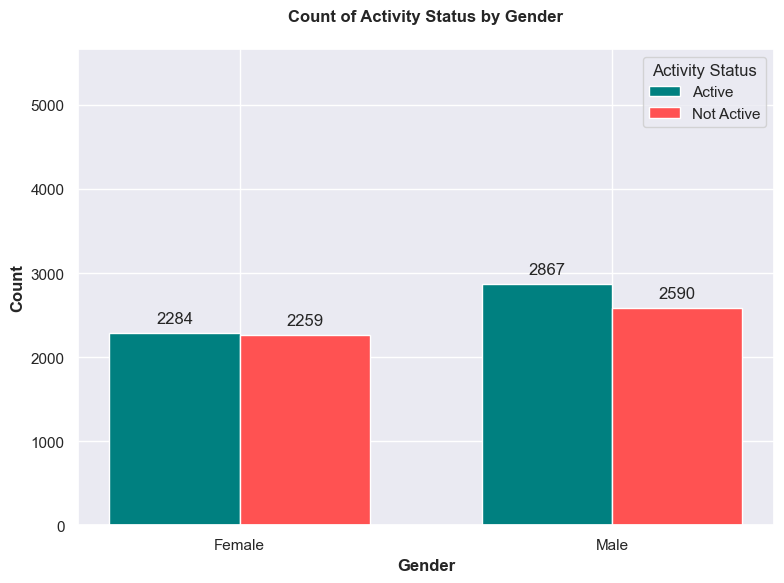

In [59]:
# Create the bar chart
fig, ax = plt.subplots(figsize=(8, 6))
df_grouped = df1.groupby('Gender')['Activity Status'].value_counts().unstack()
bar_width = 0.35

# Create positions for the bars
r1 = np.arange(len(df_grouped.index))
r2 = [x + bar_width for x in r1]

# Plot bar chart
ax.bar(r1, df_grouped['Active'], width=bar_width, label='Active', color='#008080')
ax.bar(r2, df_grouped['Not Active'], width=bar_width, label='Not Active', color='#FF5252')

# Add value annotations to each bar
for p1, p2 in zip(ax.patches[:len(df_grouped.index)], ax.patches[len(df_grouped.index):]):
    ax.annotate(str(int(p1.get_height())), (p1.get_x() + p1.get_width() / 2., p1.get_height()), 
                ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')
    ax.annotate(str(int(p2.get_height())), (p2.get_x() + p2.get_width() / 2., p2.get_height()), 
                ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')

plt.xlabel('Gender',fontweight='bold')
plt.ylabel('Count',fontweight='bold')
plt.title('Count of Activity Status by Gender',fontweight='bold',pad=20)
plt.legend(title='Activity Status')
plt.xticks([r + bar_width/2 for r in range(len(df_grouped.index))], df_grouped.index)
plt.ylim(0, df1['Activity Status'].value_counts().max() * 1.1) 
plt.tight_layout()
plt.show()

### This code is creating a new column called 'Complain' in the dataframe 'df1'. It is replacing the values in the 'Complain' column with 'Complained' if the value is 1, and with 'No Complain' if the value is 0.

In [60]:
#mapping Column to Complained and No Complain
dict4 = {
    1: 'Complained',
    0: 'No Complain'
}
df1['Complain'] = df1['Complain'].map(dict4)

### This code is creating a bar plot to display the counts of different complain statuses in the 'Complain' column of the dataframe 'df1'. 

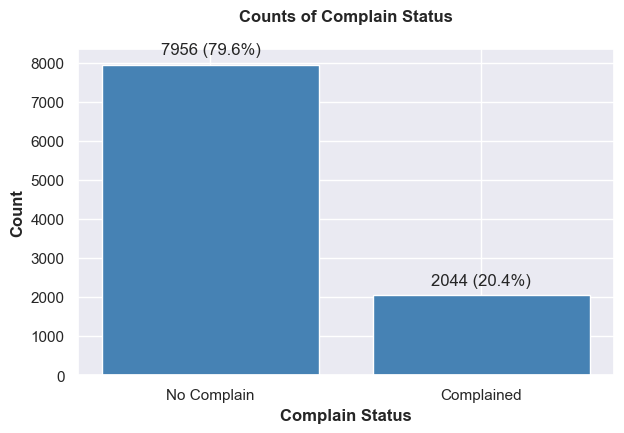

In [61]:
complain_status_count = df1['Complain'].value_counts()
total_count = len(df1)

plt.bar(complain_status_count.index.astype(str), complain_status_count.values, color='steelblue')

for i, v in enumerate(complain_status_count.values):
    percentage = (v / total_count) * 100
    plt.annotate(f"{v} ({percentage:.1f}%)", xy=(i, v), ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')

plt.xlabel('Complain Status',fontweight='bold')
plt.ylabel('Count',fontweight='bold')
plt.title('Counts of Complain Status',fontweight='bold',pad=20)

plt.tight_layout()
plt.subplots_adjust(bottom=0.2)  # Increase bottom margin

plt.show()

# Key Insight
- The bank's complaint rate is currently `20.4%`, indicating a need to prioritize reducing this rate in order to enhance customer satisfaction.

### This code is creating a bar plot to visualize the count of complain statuses in the 'Complain' column of the dataframe 'df1' grouped by 'Gender'.

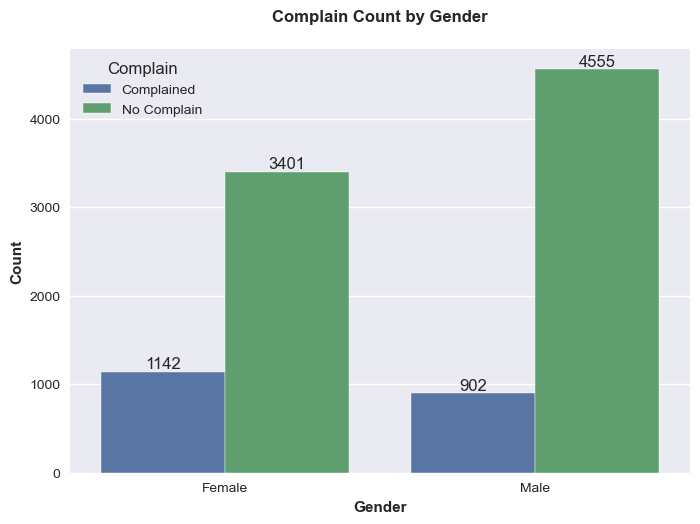

In [62]:
# Set the style
plt.style.use('seaborn')

# Group and count by gender and complaint
df_grouped = df1.groupby(['Gender', 'Complain']).size().reset_index(name='Count')

# Create the bar plot with hue parameter
fig, ax = plt.subplots()
bars = sns.barplot(data=df_grouped, x='Gender', y='Count', hue='Complain')
ax.set_xlabel('Gender',fontweight='bold')
ax.set_ylabel('Count',fontweight='bold')
ax.set_title('Complain Count by Gender',fontweight='bold',pad=20)

# Add value labels to each bar
for bar in bars.patches:
    x = bar.get_x() + bar.get_width() / 2
    y = bar.get_height()
    label = '{}'.format(int(y))
    ax.annotate(label, (x, y), ha='center', va='bottom')

plt.show()

In [63]:
#mapping Satisfaction Score
dict5 = {
    1: 'Very Unsatisfied',
    2: 'Unsatisfied',
    3: 'Neutral',
    4: 'Satisfied',
    5: 'Very Satisfied'
}

df1['Satisfaction Score'] = df1['Satisfaction Score'].map(dict5)

### This code is creating a bar plot to display the counts of different satisfaction scores in the 'Satisfaction Score' column of the dataframe 'df1'. The counts are annotated on each bar and represented as a percentage of the total count. 

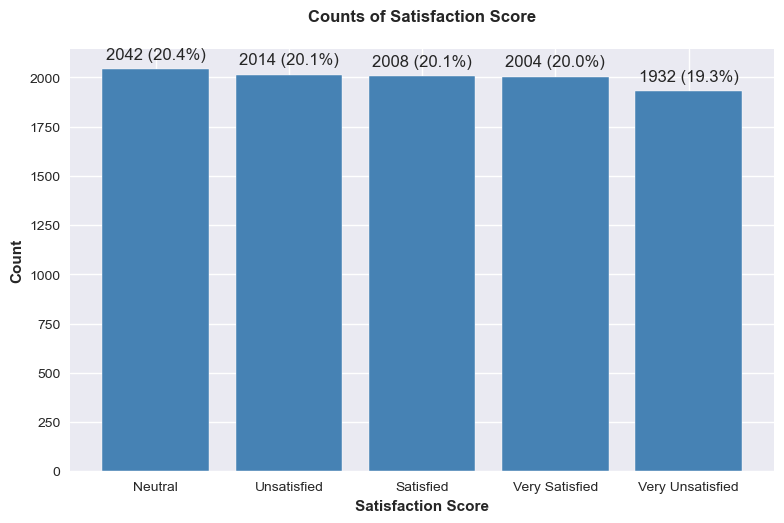

In [64]:
satisfaction_score_count = df1['Satisfaction Score'].value_counts()
total_count = len(df1)

plt.figure(figsize=(8, 6))  # Set the figsize to (8, 6) or adjust it according to your preference

plt.bar(satisfaction_score_count.index.astype(str), satisfaction_score_count.values, color='steelblue')

for i, v in enumerate(satisfaction_score_count.values):
    percentage = (v / total_count) * 100
    plt.annotate(f"{v} ({percentage:.1f}%)", xy=(i, v), ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')

plt.xlabel('Satisfaction Score',fontweight='bold')
plt.ylabel('Count',fontweight='bold')
plt.title('Counts of Satisfaction Score',fontweight='bold',pad=20)

plt.tight_layout()
plt.subplots_adjust(bottom=0.2)  # Increase bottom margin

plt.show()

### The given code creates a grouped bar plot that compares the satisfaction scores of different genders. The grouped_data variable is created by grouping the data by the 'Gender' column and counting the values of the 'Satisfaction Score' column for each group.

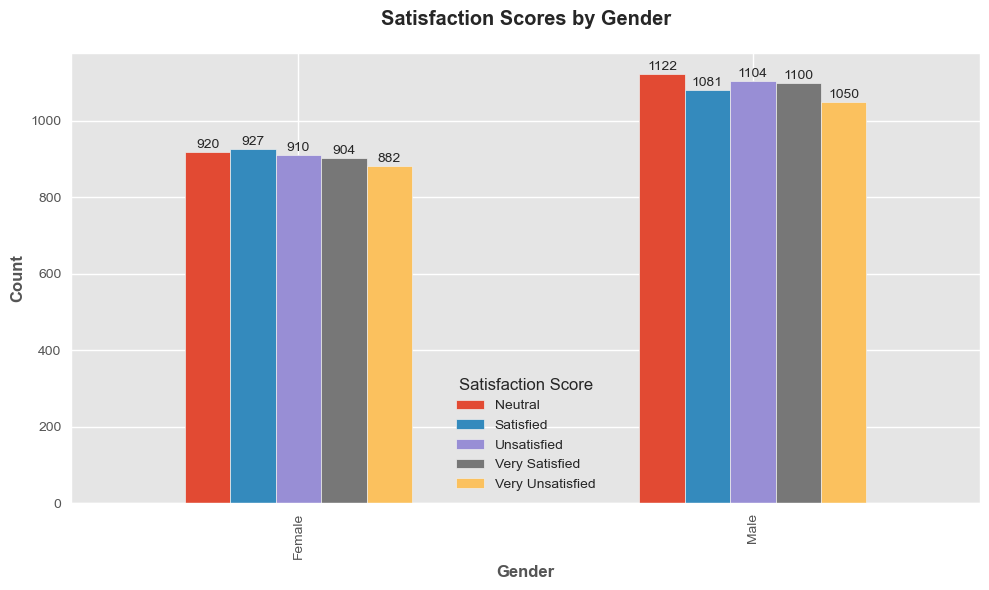

In [65]:
# Set the style
plt.style.use('ggplot')

# Group the data
grouped_data = df1.groupby('Gender')['Satisfaction Score'].value_counts().unstack()

# Create the bar plot
fig, ax = plt.subplots(figsize=(10, 6))
grouped_data.plot(kind='bar', ax=ax)

# Add data labels
for p in ax.patches:
    ax.annotate(f"{p.get_height()}" if p.get_height() >= 1 else "", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Set labels and title
ax.set_ylabel('Count',fontweight='bold')
ax.set_xlabel('Gender',fontweight='bold')
ax.set_title('Satisfaction Scores by Gender',fontweight='bold',pad=20)

# Show the plot
plt.tight_layout()
plt.show()

### This code calculates the value counts and percentages for the 'Card Type' column, and creates a bar plot with the counts displayed on each bar.

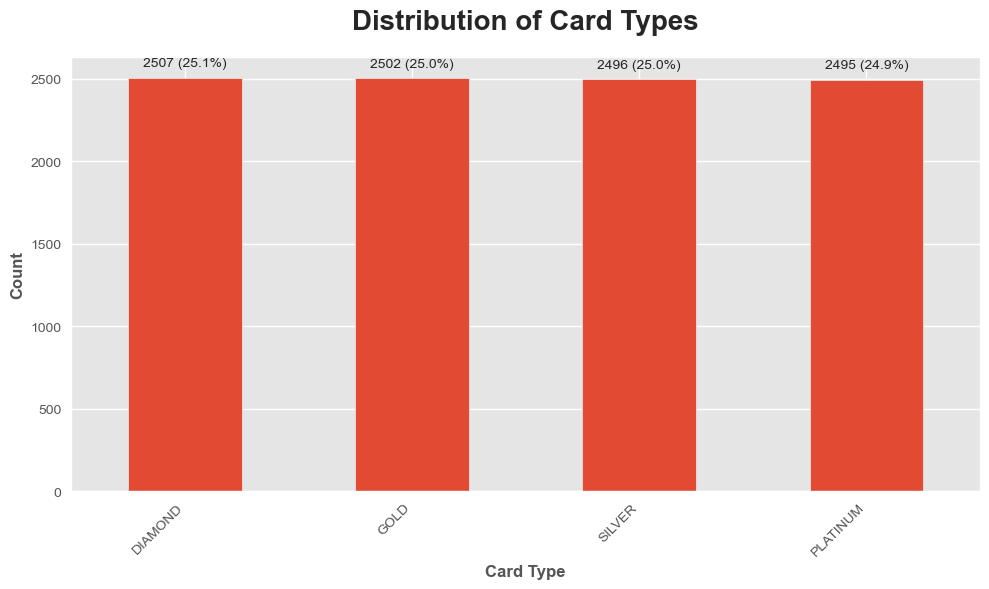

In [66]:
# Get the value counts and calculate the percentages of 'Card Type' column
card_type_counts = df1['Card Type'].value_counts()
card_type_percentages = card_type_counts / card_type_counts.sum() * 100

# Plot the bar plot
plt.figure(figsize=(10, 6))
ax = card_type_counts.plot(kind='bar')
plt.xlabel('Card Type',fontweight='bold')
plt.ylabel('Count',fontweight='bold')
plt.title('Distribution of Card Types',fontweight='bold',pad=20,fontsize=20)
plt.xticks(rotation=45)

# Enable scrolling for the x-axis labels
plt.gca().set_xticklabels(card_type_counts.index, rotation=45, ha="right")

# Add text annotations for the value counts and percentages on each bar
for i, (v, p) in enumerate(zip(card_type_counts, card_type_percentages)):
    ax.text(i, v + 50, f"{v} ({p:.1f}%)", ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()

### The given code creates a new column called 'Age Group' in the dataframe df1. The values in this column represent the age group of each individual in the 'Age' column.

In [67]:
#creating new columns for exploration (Age Group, Act Balance, Points Earned, Credit Score)

#creating an empty list
age_grp = []

#creating a loop and append the value to age_grp
for x in df1['Age']:
    if x <= 20:
        age_grp.append('<= 20')
    elif x <= 30:
        age_grp.append('21 - 30')
    elif x <= 40:
        age_grp.append('31 - 40')
    elif x <= 50:
        age_grp.append('41 - 50')
    elif x <= 60:
        age_grp.append('51 - 60')
    elif x <= 70:
        age_grp.append('61 - 70')
    elif x > 70:
        age_grp.append('> 70')

df1['Age Group'] = age_grp

### The given code creates a bar plot to visualize the counts of each age group in the 'Age Group' column of the dataframe df1.

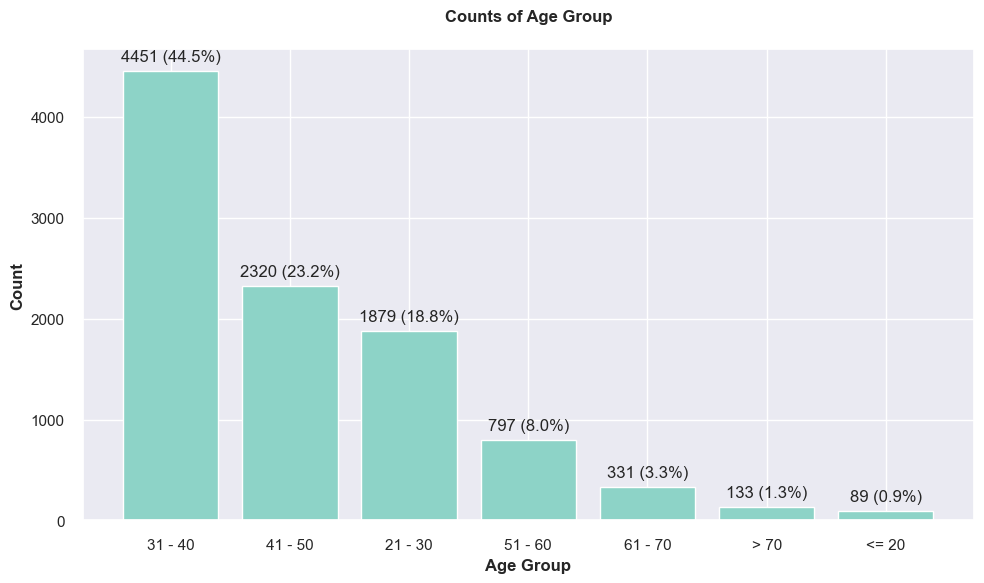

In [68]:
age_group_count = df1['Age Group'].value_counts()
total_count = len(df1)

sns.set(style='darkgrid', palette='Set3')
plt.figure(figsize=(10, 6))

plt.bar(age_group_count.index.astype(str), age_group_count.values)

for i, v in enumerate(age_group_count.values):
    percentage = (v / total_count) * 100
    plt.annotate(f"{v} ({percentage:.1f}%)", xy=(i, v), ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')

plt.xlabel('Age Group',fontweight='bold')
plt.ylabel('Count',fontweight='bold')
plt.title('Counts of Age Group',fontweight='bold',pad=20)

plt.tight_layout()

plt.show()

# Key Insight
- With the majority of customers falling within the age range of `31-40`, the bank can specifically concentrate on this demographic to enhance their services and cater to their needs.

### The given code creates a grouped bar plot that compares the distribution of age groups by gender.


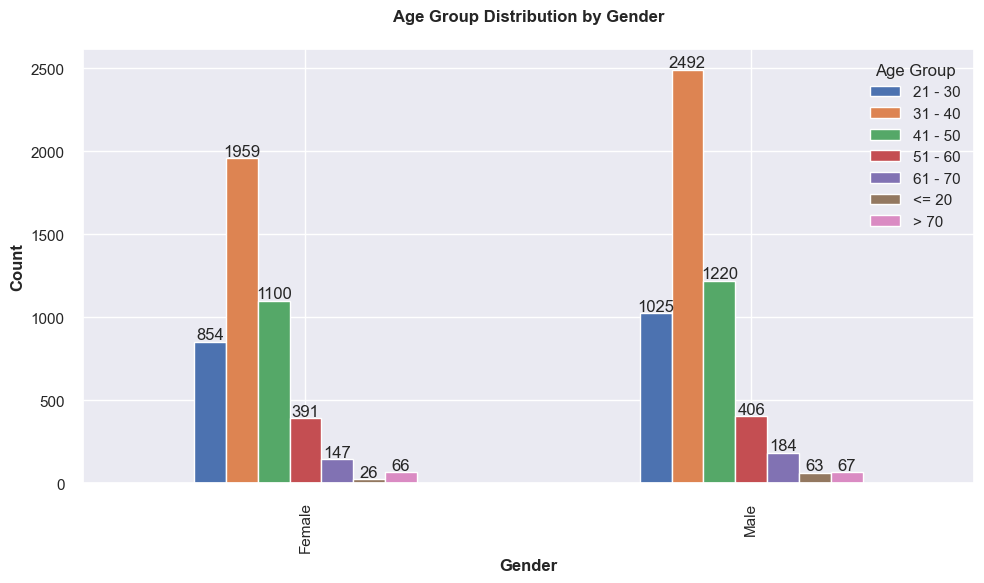

In [69]:
# Set the dynamic style
sns.set(style='darkgrid')

# Group the data
grouped_data = df1.groupby('Gender')['Age Group'].value_counts().unstack()

# Create the bar plot
fig, ax = plt.subplots(figsize=(10, 6))
grouped_data.plot(kind='bar', ax=ax)

# Add data labels
for p in ax.patches:
    ax.annotate(f"{p.get_height()}" if p.get_height() >= 1 else "", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Set labels and title
ax.set_ylabel('Count',fontweight='bold')
ax.set_xlabel('Gender',fontweight='bold')
ax.set_title('Age Group Distribution by Gender',fontweight='bold',pad=20)

# Show the plot
plt.tight_layout()
plt.show()

### The given code creates a new column called 'Acct Balance' in the dataframe df1. The values in this column represent the account balance group of each individual in the 'Balance' column.


In [70]:
#creating an empty list
acct_bal = []

#creating a loop and append the value to age_grp
for x in df1['Balance']:
    if x <= 10000:
        acct_bal.append('<= 10K')
    elif x <= 100000:
        acct_bal.append('10K - 100K')
    elif x <= 200000:
        acct_bal.append('100K - 200K')
    elif x > 200000:
        acct_bal.append('> 200K')



df1['Acct Balance'] = acct_bal

### The given code creates a bar plot to visualize the counts of each account balance group in the 'Acct Balance' column of the dataframe df1.


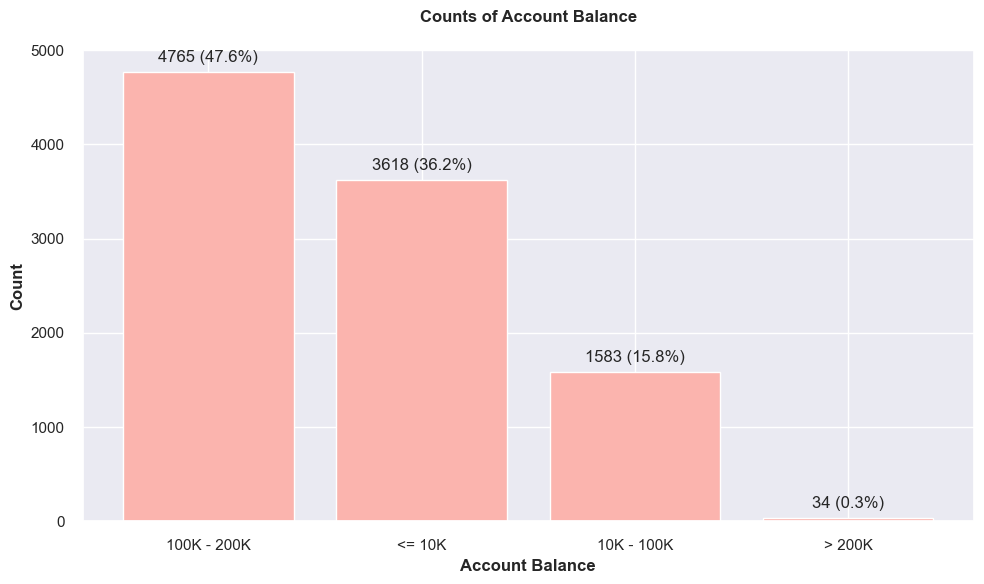

In [71]:
acct_balance_count = df1['Acct Balance'].value_counts()
total_count = len(df1)

sns.set(style='darkgrid', palette='Pastel1')
plt.figure(figsize=(10, 6))

plt.bar(acct_balance_count.index.astype(str), acct_balance_count.values)

for i, v in enumerate(acct_balance_count.values):
    percentage = (v / total_count) * 100
    plt.annotate(f"{v} ({percentage:.1f}%)", xy=(i, v), ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')

plt.xlabel('Account Balance',fontweight='bold')
plt.ylabel('Count',fontweight='bold')
plt.title('Counts of Account Balance',fontweight='bold',pad=20)

plt.tight_layout()

plt.show()

### The given code creates a grouped bar plot that compares the distribution of account balances by gender.

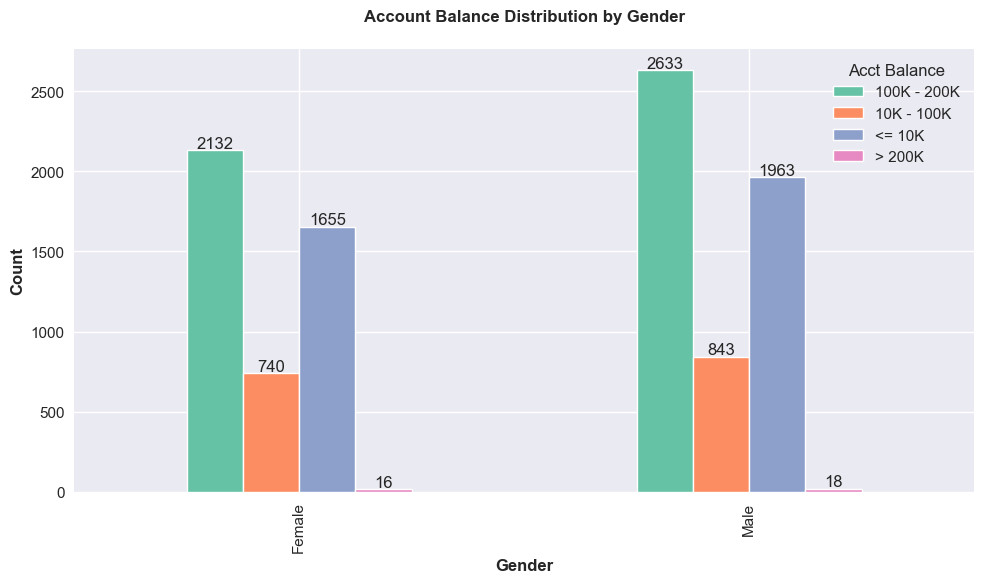

In [72]:
# Set the style and color palette
plt.style.use('seaborn-darkgrid')
colors = sns.color_palette('Set2')

# Group the data
grouped_data = df1.groupby('Gender')['Acct Balance'].value_counts().unstack()

# Create the bar plot
fig, ax = plt.subplots(figsize=(10, 6))
grouped_data.plot(kind='bar', ax=ax, color=colors)

# Add data labels
for p in ax.patches:
    ax.annotate(f"{p.get_height()}" if p.get_height() >= 1 else "", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Set labels and title
ax.set_ylabel('Count',fontweight='bold')
ax.set_xlabel('Gender',fontweight='bold')
ax.set_title('Account Balance Distribution by Gender',fontweight='bold',pad=20)

# Show the plot
plt.tight_layout()
plt.show()

### The given code creates a new column called 'Point Earned Group' in the dataframe df1. The values in this column represent the point earned group of each individual in the 'Point Earned' column.

In [73]:
#creating an empty list
pt_grp = []

#creating a loop and append the value to age_grp
for x in df1['Point Earned']:
    if x >= 100 and x <= 200:
        pt_grp.append('100 - 200')
    elif x > 200 and x <= 300:
        pt_grp.append('201 - 300')
    elif x > 300 and x <= 400:
        pt_grp.append('301 - 400')
    elif x > 400 and x <= 500:
        pt_grp.append('401 - 500')
    elif x > 500 and x <= 600:
        pt_grp.append('501 - 600')
    elif x > 600 and x <= 700:
        pt_grp.append('601 - 700')
    elif x > 700 and x <= 800:
        pt_grp.append('701 - 800')
    elif x > 800 and x <= 900:
        pt_grp.append('801 - 900')
    elif x > 900 and x <= 1000:
        pt_grp.append('901 - 1000')

df1['Point Earned Group'] = pt_grp

### This code creates a bar chart to display the counts and percentages of different groups in the "Point Earned Group" column of a dataframe.

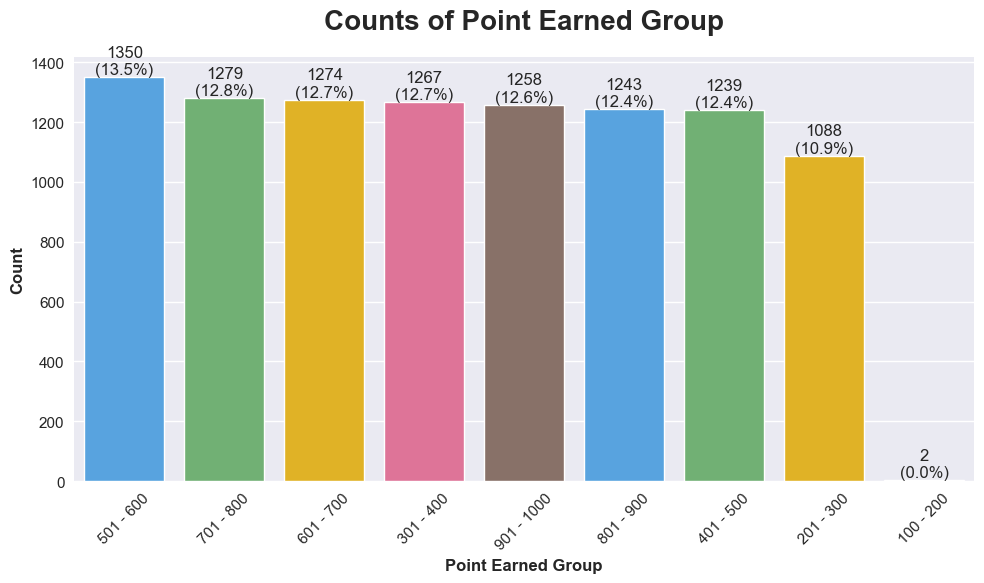

In [74]:
# Set a stylish color palette
custom_palette = ['#42a5f5', '#66bb6a', '#ffc107', '#f06292', '#8d6e63']

# Calculate the count and percentage of each group
point_earned_group_count = df1['Point Earned Group'].value_counts()
point_earned_group_percent = point_earned_group_count / point_earned_group_count.sum() * 100

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the bar chart using the custom palette
sns.barplot(x=point_earned_group_count.index.astype(str), y=point_earned_group_count.values, palette=custom_palette)

# Add the count and percentage values on top of the bars
for i, (count, percent) in enumerate(zip(point_earned_group_count.values, point_earned_group_percent)):
    plt.text(i, count, f"{count}\n({percent:.1f}%)", ha='center', va='bottom')

# Set the labels and title
plt.xlabel('Point Earned Group',fontweight='bold')
plt.ylabel('Count',fontweight='bold')
plt.title('Counts of Point Earned Group',fontweight='bold',pad=20,fontsize=20)

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45)

plt.tight_layout()

plt.show()

### This code uses the 'darkgrid' style provided by seaborn. It groups the data by 'Gender' and 'Point Earned Group', and creates a bar plot to display the count of each group within each gender.

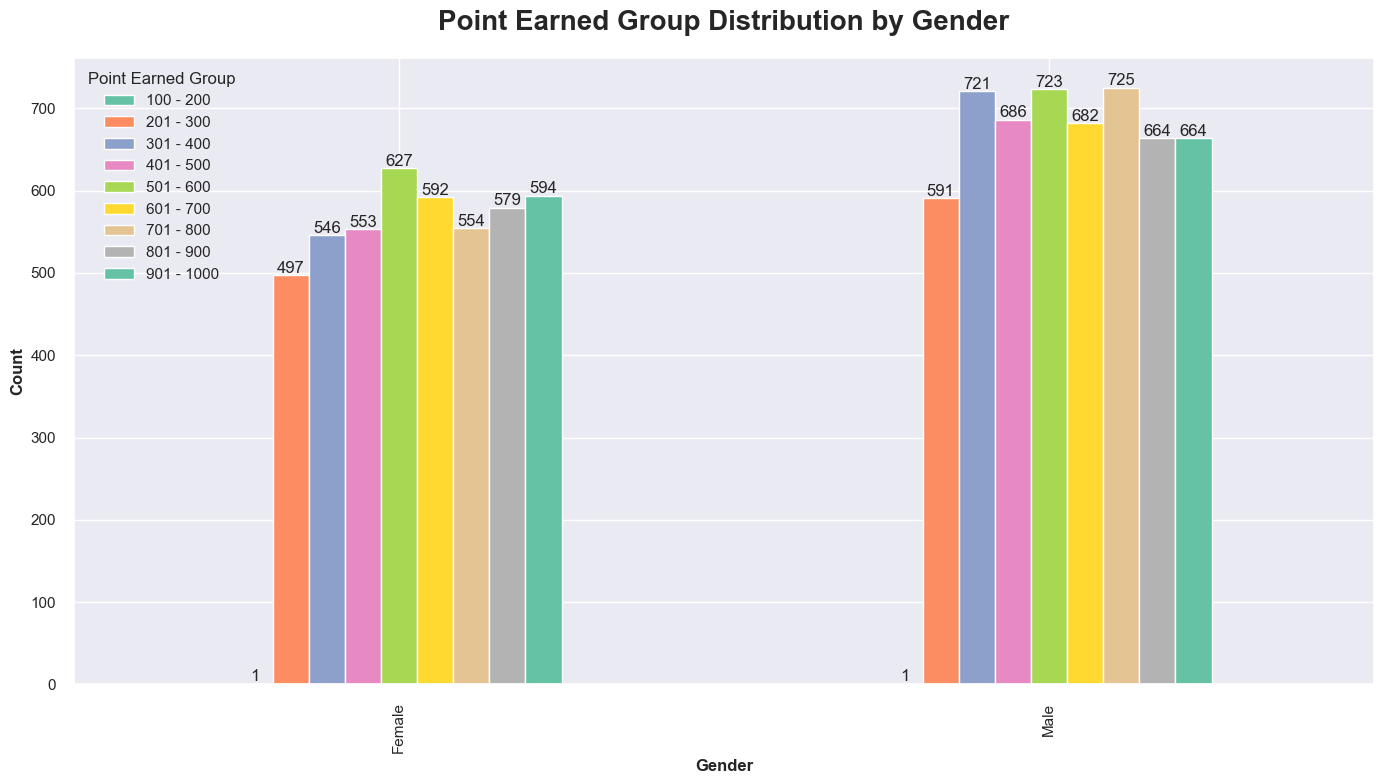

In [75]:
# Set the dynamic style
sns.set(style='darkgrid')

# Group the data
grouped_data = df1.groupby('Gender')['Point Earned Group'].value_counts().unstack()

# Create the bar plot
fig, ax = plt.subplots(figsize=(14, 8))
grouped_data.plot(kind='bar', ax=ax, color=sns.color_palette('Set2'))

# Add data labels
for p in ax.patches:
    ax.annotate(f"{p.get_height()}" if p.get_height() >= 1 else "", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Set labels and title
ax.set_ylabel('Count',fontweight='bold')
ax.set_xlabel('Gender',fontweight='bold')
ax.set_title('Point Earned Group Distribution by Gender',fontweight='bold',pad=20,fontsize=20)

# Show the plot
plt.tight_layout()
plt.show()

### This code creates a new column called 'Credit Score Group' in the dataframe 'df1', based on the values in the 'Point Earned' column. 

In [76]:
#Creating the Credit Score Group

#creating an empty list
cr_grp = []

#creating a loop and append the value to age_grp
for x in df1['Point Earned']:
    if x <= 400:
        cr_grp.append('<= 400')
    elif x > 400 and x <= 500:
        cr_grp.append('401 - 500')
    elif x > 500 and x <= 600:
        cr_grp.append('501 - 600')
    elif x > 600 and x <= 700:
        cr_grp.append('601 - 700')
    elif x > 700 and x <= 800:
        cr_grp.append('701 - 800')
    elif x > 800:
        cr_grp.append('> 800')

df1['Credit Score Group'] = cr_grp

### This code creates a bar chart to display the counts and percentages of different groups in the "Credit Score Group" column of a dataframe. 

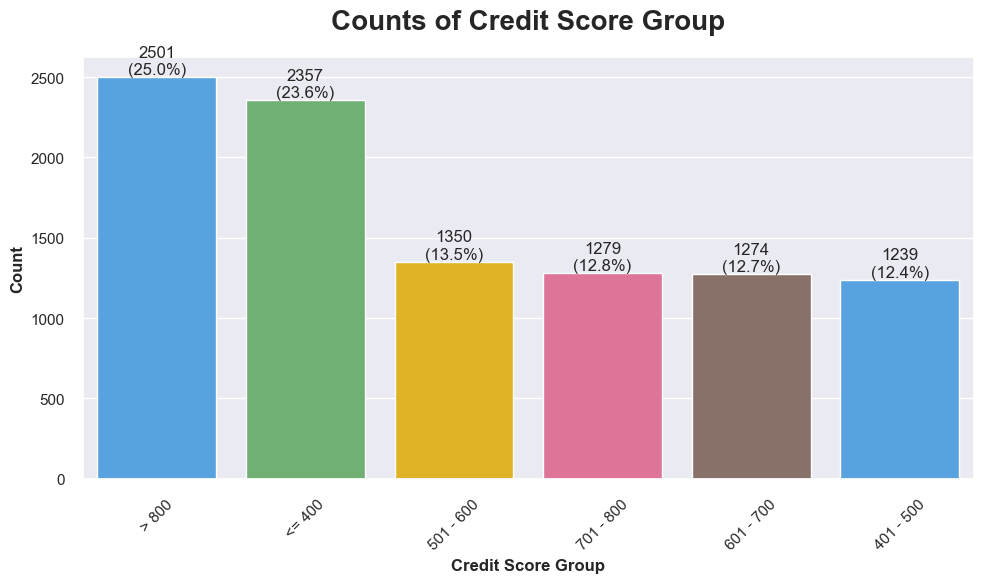

In [77]:
# Set a stylish color palette
custom_palette = ['#42a5f5', '#66bb6a', '#ffc107', '#f06292', '#8d6e63']

# Calculate the count and percentage of each group
credit_score_group_count = df1['Credit Score Group'].value_counts()
credit_score_group_percent = credit_score_group_count / credit_score_group_count.sum() * 100

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the bar chart using the custom palette
sns.barplot(x=credit_score_group_count.index.astype(str), y=credit_score_group_count.values, palette=custom_palette)

# Add the count and percentage values on top of the bars
for i, (count, percent) in enumerate(zip(credit_score_group_count.values, credit_score_group_percent)):
    plt.text(i, count, f"{count}\n({percent:.1f}%)", ha='center', va='bottom')

# Set the labels and title
plt.xlabel('Credit Score Group',fontweight='bold')
plt.ylabel('Count',fontweight='bold')
plt.title('Counts of Credit Score Group',fontweight='bold',pad=20,fontsize=20)

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Adjust the position of the title to avoid overlapping with the values on the bars
plt.subplots_adjust(top=0.85)

plt.tight_layout()

plt.show()

### This code uses the 'darkgrid' style provided by seaborn. It groups the data by 'Gender' and 'Credit Score Group', and creates a bar plot to display the count of each group within each gender.

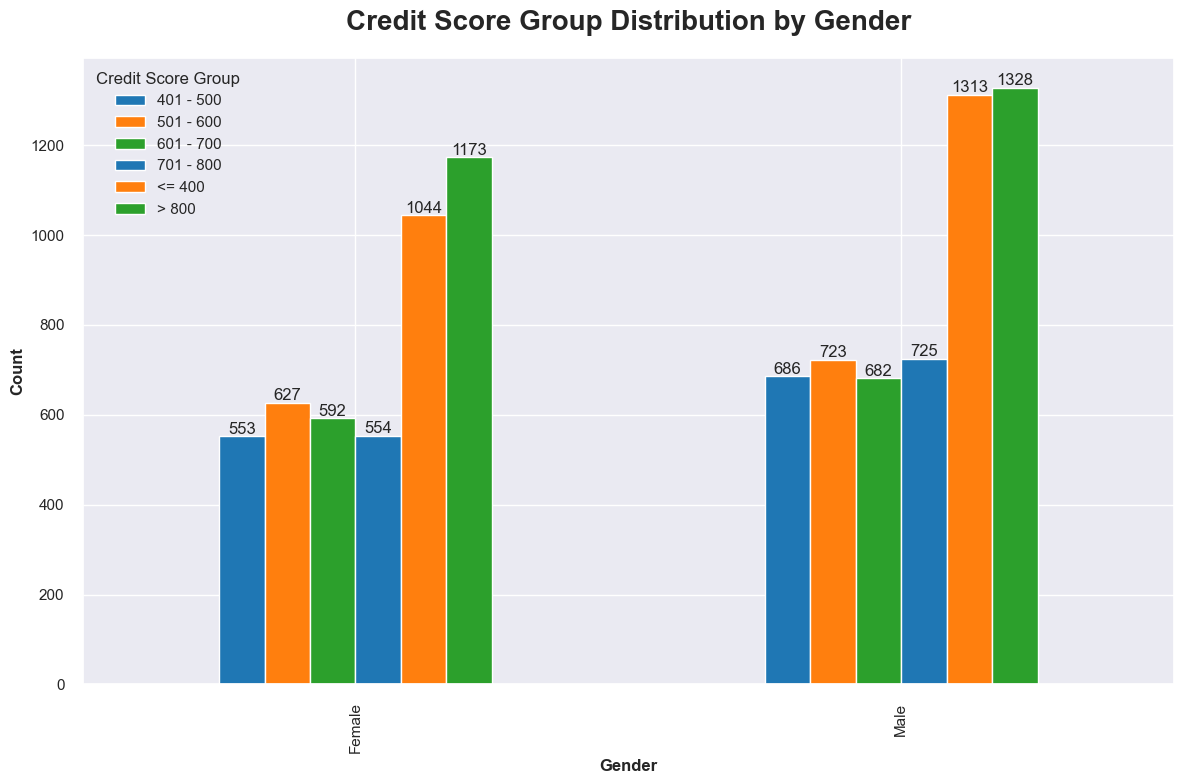

In [78]:
# Set the style
sns.set(style='darkgrid')

# Group the data
grouped_data = df1.groupby('Gender')['Credit Score Group'].value_counts().unstack()

# Create the bar plot
fig, ax = plt.subplots(figsize=(12, 8))
grouped_data.plot(kind='bar', ax=ax, color=['#1f77b4', '#ff7f0e', '#2ca02c'])

# Add data labels
for p in ax.patches:
    ax.annotate(f"{p.get_height()}" if p.get_height() >= 1 else "", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Set labels and title
ax.set_ylabel('Count',fontweight='bold')
ax.set_xlabel('Gender',fontweight='bold')
ax.set_title('Credit Score Group Distribution by Gender',fontweight='bold',pad=20,fontsize=20)

# Show the plot
plt.tight_layout()
plt.show()

### This code creates a bar chart to display the counts and percentages of different age groups in the 'Age Group' column of a dataframe. 

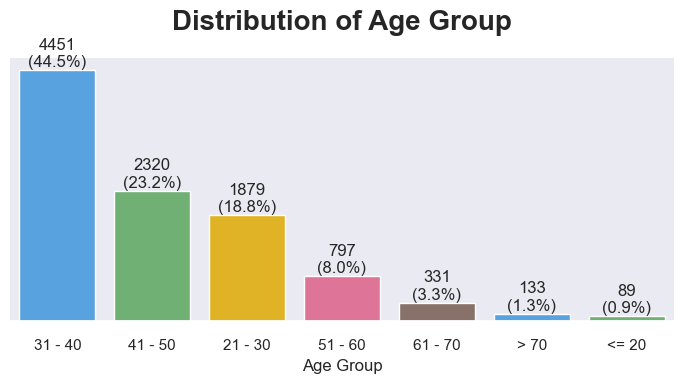

In [79]:
# Set a stylish color palette
custom_palette = ['#42a5f5', '#66bb6a', '#ffc107', '#f06292', '#8d6e63']

# Calculate the count and percentage of each age group
age_group_count = df1['Age Group'].value_counts()
age_group_percent = age_group_count / age_group_count.sum() * 100

# Set the figure size
fig, ax = plt.subplots(figsize=[7, 4])

# Plot the bar chart using the custom palette
sns.barplot(x=age_group_count.index, y=age_group_count.values, palette=custom_palette, ax=ax)

# Add the count and percentage values on top of the bars
for i, (count, percent) in enumerate(zip(age_group_count.values, age_group_percent)):
    ax.text(i, count, f"{count}\n({percent:.1f}%)", ha='center', va='bottom')

# Remove the spines and y-axis
ax.spines[['left', 'right', 'top']].set_visible(False)
ax.yaxis.set_visible(False)

# Adjust the position of the title to avoid overlapping with the values on the bars
ax.set_title('Distribution of Age Group',fontweight='bold',pad=20,fontsize=20)

plt.tight_layout()

plt.show()

In [80]:
#Calculating total customers
total_customers = df1['CustomerId'].count()
total_customers

10000

In [81]:
#Creating the churn dataframe
churned_df = df1[df1['Churned Status']=='Churned']

In [82]:
#calculating total churn
total_churn = churned_df['CustomerId'].count()
total_churn

2038

In [83]:
#calculating the churn rate
churn_rate = ((total_churn/total_customers)*100).round(2)
churn_rate

20.38

In [84]:
#Summarize the data by Gender
gender_churn = df1.pivot_table(index='Gender', columns='Churned Status', values='CustomerId', aggfunc='count')
gender_churn

Churned Status  Churned  Not Churned
Gender                              
Female             1139         3404
Male                899         4558

In [85]:
#create the percentage churned and not churned for the gender
gender_churn['% Churned'] = round((gender_churn['Churned']/(gender_churn['Churned']+gender_churn['Not Churned']))*100, 1)
gender_churn['% Not Churned'] = round((gender_churn['Not Churned']/(gender_churn['Churned']+gender_churn['Not Churned']))*100, 1)

In [86]:
#display the gender churn
gender_churn

Churned Status  Churned  Not Churned  % Churned  % Not Churned
Gender                                                        
Female             1139         3404       25.1           74.9
Male                899         4558       16.5           83.5

In [87]:
#summarize the account activity
act_churn = df1.pivot_table(index='Activity Status', columns='Churned Status', values='CustomerId', aggfunc='count')
act_churn

Churned Status   Churned  Not Churned
Activity Status                      
Active               735         4416
Not Active          1303         3546

In [88]:
#creating percentage churn and not churn columns
act_churn['% Churned'] = round((act_churn['Churned']/(act_churn['Churned']+act_churn['Not Churned']))*100, 1)
act_churn['% Not Churned'] = round((act_churn['Not Churned']/(act_churn['Churned']+act_churn['Not Churned']))*100, 1)

In [89]:
#display the act_churn
act_churn

Churned Status   Churned  Not Churned  % Churned  % Not Churned
Activity Status                                                
Active               735         4416       14.3           85.7
Not Active          1303         3546       26.9           73.1

In [90]:
complain_churn = df1.pivot_table(index='Complain', columns='Churned Status', values='CustomerId', aggfunc='count')
complain_churn

Churned Status  Churned  Not Churned
Complain                            
Complained         2034           10
No Complain           4         7952

In [91]:
#creating percentage churn and not churn columns
complain_churn['% Churned'] = round((complain_churn['Churned']/(complain_churn['Churned']+complain_churn['Not Churned']))*100, 1)
complain_churn['% Not Churned'] = round((complain_churn['Not Churned']/(complain_churn['Churned']+complain_churn['Not Churned']))*100, 1)
complain_churn

Churned Status  Churned  Not Churned  % Churned  % Not Churned
Complain                                                      
Complained         2034           10       99.5            0.5
No Complain           4         7952        0.1           99.9

In [92]:
# Summarize the data by Credit Card users

card_churn = df1.pivot_table(index='HasCrCard', columns='Churned Status', values='CustomerId', aggfunc='count')
card_churn

Churned Status  Churned  Not Churned
HasCrCard                           
No                  613         2332
Yes                1425         5630

In [93]:
#creating percentage churn and not churn columns
card_churn['% Churned'] = round((card_churn['Churned']/(card_churn['Churned']+card_churn['Not Churned']))*100, 1)
card_churn['% Not Churned'] = round((card_churn['Not Churned']/(card_churn['Churned']+card_churn['Not Churned']))*100, 1)
card_churn

Churned Status  Churned  Not Churned  % Churned  % Not Churned
HasCrCard                                                     
No                  613         2332       20.8           79.2
Yes                1425         5630       20.2           79.8

In [94]:
#summarize the table by country and churn status
churn_country = df1.pivot_table(index='Country', columns='Churned Status', values='CustomerId', aggfunc='count')
churn_country

Churned Status  Churned  Not Churned
Country                             
France              811         4203
Germany             814         1695
Spain               413         2064

In [95]:
#create percentage churned and not churned
churn_country['% Churned'] = round((churn_country['Churned']/(churn_country['Churned']+churn_country['Not Churned']))*100, 1)
churn_country['% Not Churned'] = round((churn_country['Not Churned']/(churn_country['Churned']+churn_country['Not Churned']))*100, 1)
churn_country

Churned Status  Churned  Not Churned  % Churned  % Not Churned
Country                                                       
France              811         4203       16.2           83.8
Germany             814         1695       32.4           67.6
Spain               413         2064       16.7           83.3

In [96]:
#group the dataframe by Age group and count the total. This gives the total customers by Age Group
ag1 = df1.groupby(['Age Group'], as_index=False).agg(total=('CustomerId', 'count'))
ag1

Age Group  total
0   21 - 30   1879
1   31 - 40   4451
2   41 - 50   2320
3   51 - 60    797
4   61 - 70    331
5     <= 20     89
6      > 70    133

In [97]:
#group the churned dataframe by Age group and count the total. This gives the total churn by age group
ag2 = churned_df.groupby('Age Group', as_index=False).agg(total_churn=('CustomerId', 'count'))
ag2

Age Group  total_churn
0   21 - 30          143
1   31 - 40          539
2   41 - 50          788
3   51 - 60          448
4   61 - 70          104
5     <= 20            5
6      > 70           11

### This code merges the two DataFrames "ag1" and "ag2" based on the "Age Group" column.

In [98]:
#merged the two dataframe based on the age group. This create a dataframe of age group with total customers and total churn
age_grp_merged = ag1.merge(ag2, how='inner', on='Age Group')
age_grp_merged

Age Group  total  total_churn
0   21 - 30   1879          143
1   31 - 40   4451          539
2   41 - 50   2320          788
3   51 - 60    797          448
4   61 - 70    331          104
5     <= 20     89            5
6      > 70    133           11

### This code calculates the churn rate by dividing the total number of churned customers ('total_churn') by the total number of customers ('total') in each age group.

In [99]:
#calculate the churn rate and create the column in the dataframe
age_grp_merged['churn_rate'] = round((age_grp_merged['total_churn']/age_grp_merged['total'])*100, 1)
age_grp_merged

Age Group  total  total_churn  churn_rate
0   21 - 30   1879          143         7.6
1   31 - 40   4451          539        12.1
2   41 - 50   2320          788        34.0
3   51 - 60    797          448        56.2
4   61 - 70    331          104        31.4
5     <= 20     89            5         5.6
6      > 70    133           11         8.3

In [100]:
#create an index column for sorting the dataframe based on Age Group
age_grp_merged['index'] = age_grp_merged['Age Group']

#create a map dictionary
dict7 = {
    '<= 20': 1,
    '21 - 30': 2,
    '31 - 40': 3,
    '41 - 50': 4,
    '51 - 60': 5,
    '61 - 70': 6,
    '> 70': 7
}

#map the index to the dict7
age_grp_merged['index'] = age_grp_merged['index'].map(dict7)

### This code sorts the 'age_grp_merged' DataFrame in ascending order based on the 'index' column.

In [101]:
#sort the dataframe using the index column
age_grp_merged = age_grp_merged.sort_values('index', ascending=True)
age_grp_merged

Age Group  total  total_churn  churn_rate  index
5     <= 20     89            5         5.6      1
0   21 - 30   1879          143         7.6      2
1   31 - 40   4451          539        12.1      3
2   41 - 50   2320          788        34.0      4
3   51 - 60    797          448        56.2      5
4   61 - 70    331          104        31.4      6
6      > 70    133           11         8.3      7

### This code reorders the columns in the 'age_grp_merged' DataFrame to ['index', 'Age Group', 'total','total_churn', 'churn_rate']. The reindex() function is used to reorder the columns along the axis=1 (columns).

In [102]:
#reorder the columns
age_grp_merged = age_grp_merged.reindex(labels=['index', 'Age Group', 'total','total_churn', 'churn_rate'], axis=1)
age_grp_merged

index Age Group  total  total_churn  churn_rate
5      1     <= 20     89            5         5.6
0      2   21 - 30   1879          143         7.6
1      3   31 - 40   4451          539        12.1
2      4   41 - 50   2320          788        34.0
3      5   51 - 60    797          448        56.2
4      6   61 - 70    331          104        31.4
6      7      > 70    133           11         8.3

### This code creates a dual plot using the `matplotlib` library to visualize the total number of customers and the churn rate by age group.

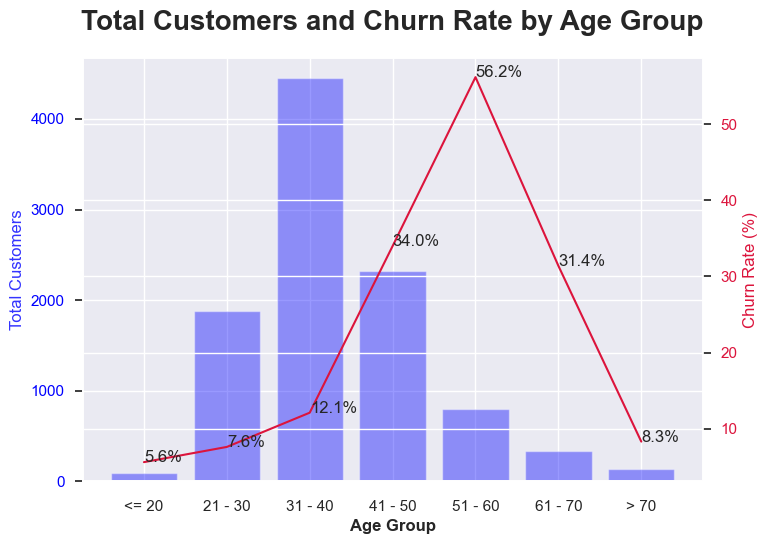

In [103]:
#Creating a dual plot of total customer and churn rate by Age group

fig, ax = plt.subplots()
color1 = 'blue'
ax.bar(x=age_grp_merged['Age Group'], height=age_grp_merged['total'], alpha=0.4, color=color1)

#add ylabel, x_label and title
ax.set_ylabel('Total Customers', color=color1, alpha=0.8) #add y_label
ax.set_xlabel('Age Group',fontweight='bold') #add x_label
ax.set_title('Total Customers and Churn Rate by Age Group',fontweight='bold',pad=20,fontsize=20) #add title
ax.tick_params(axis='y', labelcolor=color1)



ax1 = ax.twinx()

color2 = 'crimson'
ax1.plot(age_grp_merged['Age Group'], age_grp_merged['churn_rate'], color=color2)

#add ylabel
ax1.set_ylabel('Churn Rate (%)', color=color2)
ax1.tick_params(axis='y', labelcolor=color2)

for index, value in enumerate(age_grp_merged['churn_rate']):
    ax1.text(index, value, str(value)+'%')

plt.show()

# Key Insight
- This graph clearly suggests that customers within the age range of `51-60` have a higher likelihood of churning from the bank. Therefore, the bank should prioritize focusing on this age range, identifying the reasons behind their churn, and implementing measures to address and mitigate those reasons.

### This code groups the DataFrame `df1` by the 'Acct Balance' column, and then calculates the total number of customers for each unique account balance.

In [104]:
#group by acct balance and get the total customers
act_bal_grp = df1.groupby(['Acct Balance'], as_index=False).agg(total=('CustomerId', 'count'))
act_bal_grp

Acct Balance  total
0  100K - 200K   4765
1   10K - 100K   1583
2       <= 10K   3618
3       > 200K     34

In [105]:
#group the churned data by acct balance and get the total churned
churn_acct = churned_df.groupby(['Acct Balance'], as_index=False).agg(total_churn=('CustomerId', 'count'))
churn_acct

Acct Balance  total_churn
0  100K - 200K         1192
1   10K - 100K          326
2       <= 10K          501
3       > 200K           19

In [106]:
#merged the two dataframe together
acct_bal_merged = act_bal_grp.merge(churn_acct, on='Acct Balance', how='inner')
acct_bal_merged

Acct Balance  total  total_churn
0  100K - 200K   4765         1192
1   10K - 100K   1583          326
2       <= 10K   3618          501
3       > 200K     34           19

In [107]:
#add an index column for sorting the dataframe
acct_bal_merged['index'] = acct_bal_merged['Acct Balance']

#create a dictionary
dict8 = {
    '<= 10K': 1,
    '10K - 100K': 2,
    '100K - 200K': 3,
    '> 200K': 4
}

#map the dict to the index
acct_bal_merged['index'] = acct_bal_merged['index'].map(dict8)

In [108]:
acct_bal_merged

Acct Balance  total  total_churn  index
0  100K - 200K   4765         1192      3
1   10K - 100K   1583          326      2
2       <= 10K   3618          501      1
3       > 200K     34           19      4

In [109]:
#sort the dataframe by indec
acct_bal_merged = acct_bal_merged.sort_values('index', ascending=True)
acct_bal_merged

Acct Balance  total  total_churn  index
2       <= 10K   3618          501      1
1   10K - 100K   1583          326      2
0  100K - 200K   4765         1192      3
3       > 200K     34           19      4

In [110]:
#reorder the columns
acct_bal_merged = acct_bal_merged.reindex(labels=['index', 'Acct Balance', 'total', 'total_churn'], axis=1)
acct_bal_merged

index Acct Balance  total  total_churn
2      1       <= 10K   3618          501
1      2   10K - 100K   1583          326
0      3  100K - 200K   4765         1192
3      4       > 200K     34           19

In [111]:
#create a churn rate column
acct_bal_merged['churn_rate'] = round((acct_bal_merged['total_churn']/acct_bal_merged['total'])*100, 1)
acct_bal_merged

index Acct Balance  total  total_churn  churn_rate
2      1       <= 10K   3618          501        13.8
1      2   10K - 100K   1583          326        20.6
0      3  100K - 200K   4765         1192        25.0
3      4       > 200K     34           19        55.9

### This code creates a dual plot of total customers and churn rate by account balance, with the blue bars representing the total customers and the red line representing the churn rate.

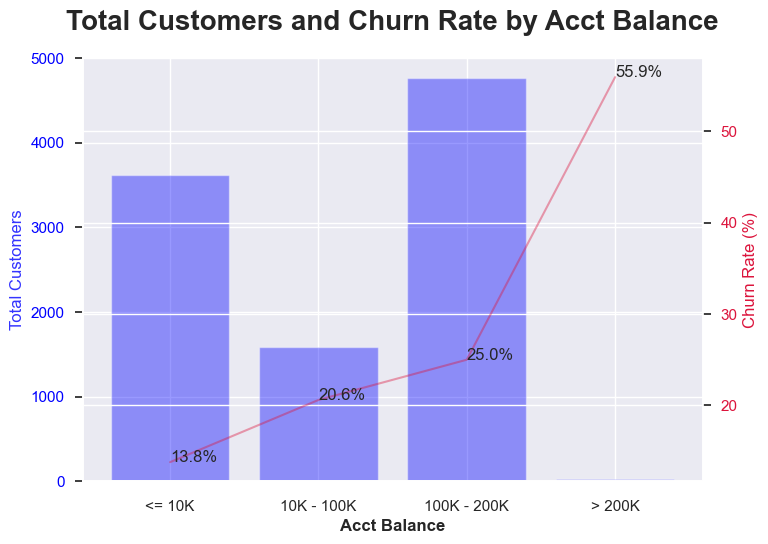

In [112]:
#Creating a dual plot of total customer and churn rate by Acct Balance

fig, ax = plt.subplots()
color1 = 'blue'
ax.bar(x=acct_bal_merged['Acct Balance'], height=acct_bal_merged['total'], alpha=0.4, color=color1)

#add ylabel, x_label and title
ax.set_ylabel('Total Customers', color=color1, alpha=0.8) #add y_label
ax.set_xlabel('Acct Balance',fontweight='bold') #add x_label
ax.set_title('Total Customers and Churn Rate by Acct Balance',fontweight='bold',pad=20,fontsize=20) #add title
ax.tick_params(axis='y', labelcolor=color1)



ax1 = ax.twinx()

color2 = 'crimson'
ax1.plot(acct_bal_merged['Acct Balance'], acct_bal_merged['churn_rate'], color=color2, alpha=0.4)

#add ylabel
ax1.set_ylabel('Churn Rate (%)', color=color2)
ax1.tick_params(axis='y', labelcolor=color2)

for index, value in enumerate(acct_bal_merged['churn_rate']):
    ax1.text(index, value, str(value)+'%')

plt.show()

In [113]:
df1.head(2)

RowNumber  CustomerId   Surname  CreditScore Country  Gender  Age  Tenure  \
0          1    15634602  Hargrave          619  France  Female   42       2   
1          2    15647311      Hill          608   Spain  Female   41       1   

    Balance  NumOfProducts  ... EstimatedSalary Churned Status    Complain  \
0      0.00              1  ...       101348.88        Churned  Complained   
1  83807.86              1  ...       112542.58    Not Churned  Complained   

  Satisfaction Score Card Type Point Earned Age Group  Acct Balance  \
0        Unsatisfied   DIAMOND          464   41 - 50        <= 10K   
1            Neutral   DIAMOND          456   41 - 50    10K - 100K   

  Point Earned Group Credit Score Group  
0          401 - 500          401 - 500  
1          401 - 500          401 - 500  

[2 rows x 22 columns]

In [114]:
#summarize the data by satisfaction
sat_churn = df1.pivot_table(index='Satisfaction Score', columns='Churned Status', values='CustomerId', aggfunc='count', margins=True, margins_name='Total')
sat_churn

Churned Status      Churned  Not Churned  Total
Satisfaction Score                             
Neutral                 401         1641   2042
Satisfied               414         1594   2008
Unsatisfied             439         1575   2014
Very Satisfied          397         1607   2004
Very Unsatisfied        387         1545   1932
Total                  2038         7962  10000

In [115]:
#create a churn rate column
sat_churn['Churn Rate'] = round((sat_churn['Churned']/sat_churn['Total'])*100, 1)
sat_churn

Churned Status      Churned  Not Churned  Total  Churn Rate
Satisfaction Score                                         
Neutral                 401         1641   2042        19.6
Satisfied               414         1594   2008        20.6
Unsatisfied             439         1575   2014        21.8
Very Satisfied          397         1607   2004        19.8
Very Unsatisfied        387         1545   1932        20.0
Total                  2038         7962  10000        20.4

In [116]:
#drop unnecessary rows
sat_churn.drop('Total', axis=0, inplace=True)

In [117]:
sat_churn.index

Index(['Neutral', 'Satisfied', 'Unsatisfied', 'Very Satisfied',
       'Very Unsatisfied'],
      dtype='object', name='Satisfaction Score')

In [118]:
#sort the dataframe by index
sat_churn = sat_churn.reindex(labels=['Very Unsatisfied', 'Unsatisfied', 'Neutral', 'Satisfied', 'Very Satisfied'], axis=0)
sat_churn

Churned Status      Churned  Not Churned  Total  Churn Rate
Satisfaction Score                                         
Very Unsatisfied        387         1545   1932        20.0
Unsatisfied             439         1575   2014        21.8
Neutral                 401         1641   2042        19.6
Satisfied               414         1594   2008        20.6
Very Satisfied          397         1607   2004        19.8

### This code creates a dual plot of total customers and churn rate by satisfaction score, with the bars representing the total customers and the line representing the churn rate. It also includes annotations for the churn rate values on the line chart.

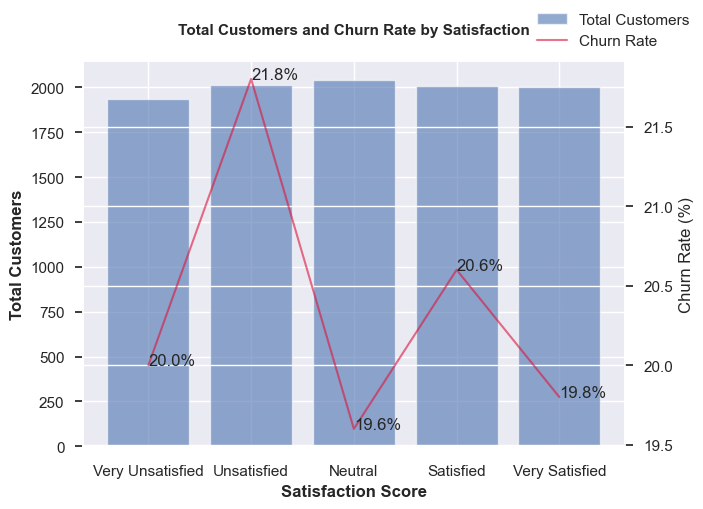

In [119]:
#plotting total customer and churn rate by Satisfaction
fig, ax = plt.subplots(figsize=[7, 5])

ax.bar(sat_churn.index, sat_churn['Total'], alpha=0.6, label='Total Customers')

ax1 = ax.twinx()

color2 = 'crimson'
ax1.plot(sat_churn.index, sat_churn['Churn Rate'], color = color2, alpha=0.6, label='Churn Rate')

#add title, label and legend
ax.set_title('Total Customers and Churn Rate by Satisfaction', size=10,fontweight='bold',fontsize=11,pad=20)
ax.set_xlabel('Satisfaction Score',fontweight='bold')
ax.set_ylabel('Total Customers',fontweight='bold')
ax1.set_ylabel('Churn Rate (%)')
fig.legend()

#add annotation to the line chart
for index, values in enumerate(sat_churn['Churn Rate']):
    ax1.text(index, values, str(values)+'%')

  
plt.show()

# Key Insight
- In order to reduce the churn rate, it is crucial for the bank to understand the characteristics and attributes of unsatisfied customers who have left. By gathering key information about these customers, the bank can identify the reasons behind their dissatisfaction and churn, and subsequently implement necessary measures to address those issues. This proactive approach will help to decrease the churn rate and increase overall customer satisfaction in the future.

In [120]:
#summarize the data by tenure
tenure_churn = df1.pivot_table(index='Tenure', columns='Churned Status', values='CustomerId', aggfunc='count', margins=True,
                              margins_name='Total')
tenure_churn

Churned Status  Churned  Not Churned  Total
Tenure                                     
0                    95          318    413
1                   232          803   1035
2                   201          847   1048
3                   213          796   1009
4                   203          786    989
5                   209          803   1012
6                   196          771    967
7                   177          851   1028
8                   197          828   1025
9                   214          770    984
10                  101          389    490
Total              2038         7962  10000

In [121]:
#dropping the row total
tenure_churn.drop('Total', axis=0, inplace=True)

In [122]:
#creating the % churned and % Not churned columns
tenure_churn['Churn Rate'] = round((tenure_churn['Churned']/tenure_churn['Total'])*100, 1)
tenure_churn

Churned Status  Churned  Not Churned  Total  Churn Rate
Tenure                                                 
0                    95          318    413        23.0
1                   232          803   1035        22.4
2                   201          847   1048        19.2
3                   213          796   1009        21.1
4                   203          786    989        20.5
5                   209          803   1012        20.7
6                   196          771    967        20.3
7                   177          851   1028        17.2
8                   197          828   1025        19.2
9                   214          770    984        21.7
10                  101          389    490        20.6

### This code creates a dual plot of total customers and churn rate by tenure, with the bars representing the total customers and the line representing the churn rate. It also includes annotations for the churn rate values on the line chart. The second y-axis ticks are removed for better visualization.

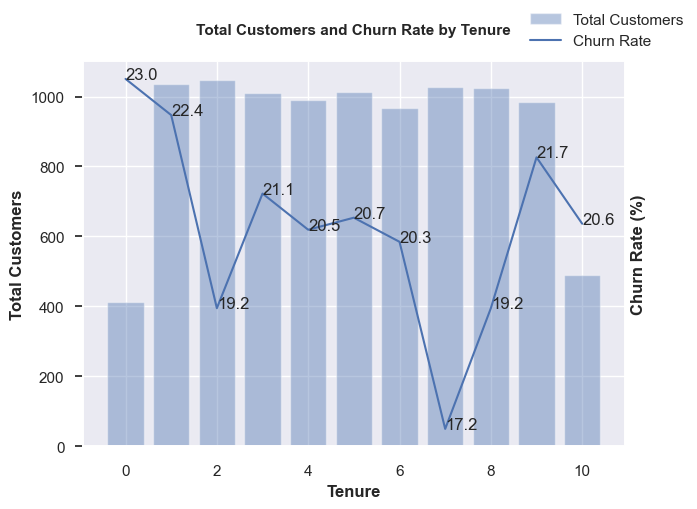

In [123]:
#plotting the total customers and churn rate
fig, ax = plt.subplots(figsize=[7,5])

ax.bar(x=tenure_churn.index,
      height=tenure_churn['Total'],
      label='Total Customers',
      alpha=0.4)

ax1 = ax.twinx()

ax1.plot(tenure_churn.index,
        tenure_churn['Churn Rate'],
        label='Churn Rate')

#add label, titile, remove spine
ax.set_title('Total Customers and Churn Rate by Tenure', size=10,fontweight='bold',pad=20,fontsize=11)
ax.set_ylabel('Total Customers',fontweight='bold')
ax1.set_ylabel('Churn Rate (%)',fontweight='bold')
ax.set_xlabel('Tenure',fontweight='bold')
fig.legend()

#remove tick on the second y axis
ax1.yaxis.set_ticks([])

#annotate the line chart
for index, value in enumerate(tenure_churn['Churn Rate']):
    ax1.text(index, value, str(value))

plt.show()

# Key Insight
- This graph clearly highlights that customers who have a tenure of `5-7` years with the bank exhibit a significantly lower churn rate. This key information can help the bank focus on understanding the factors that contribute to higher customer loyalty and satisfaction among this segment. By gaining insights from these long-standing customers, the bank can implement strategies and initiatives to enhance customer retention for other segments as well.

In [124]:
df.rename(columns={"Exited": "Churned Status"}, inplace=True)

### This code creates a`KDE` plot to visualize the distribution of tenure by churned status.

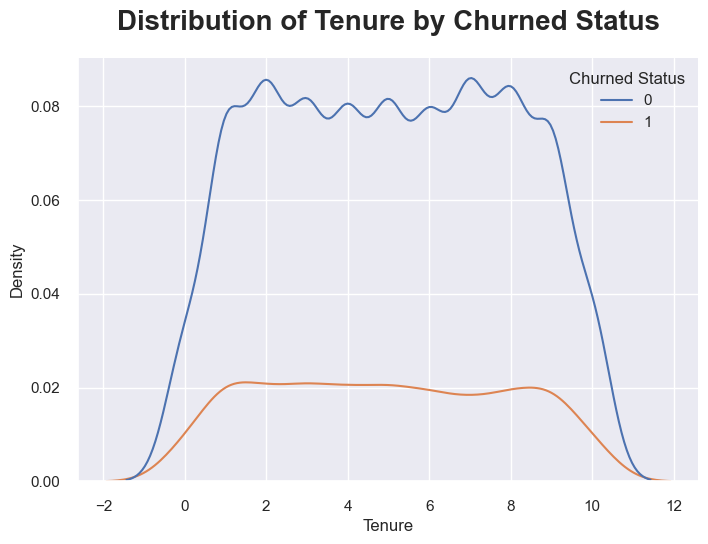

In [125]:
churned_status = df['Churned Status']
tenure = df['Tenure']
# Set plot style
sns.set(style="darkgrid")

# Create the KDE plot
sns.kdeplot(data=df, x=tenure, hue=churned_status)

plt.title('Distribution of Tenure by Churned Status',fontweight='bold',pad=20,fontsize=20)
# Display the plot
sns.despine()
plt.show()


### This code creates a `KDE` plot to visualize the distribution of age by churned status. 

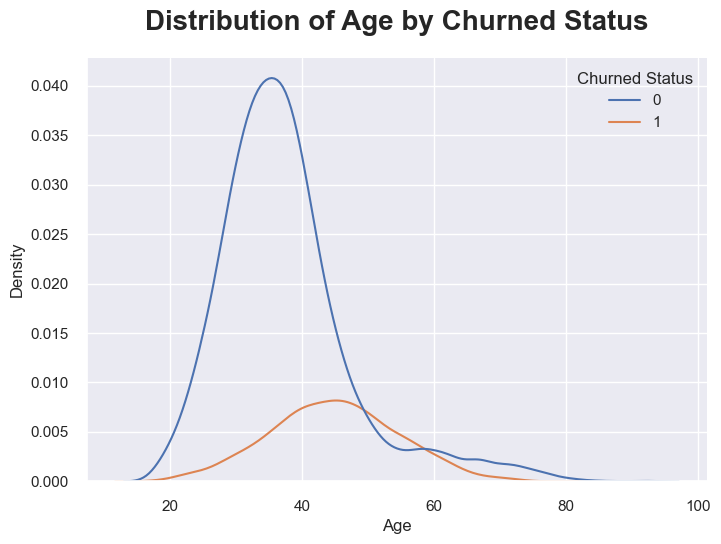

In [126]:
churned_status = df['Churned Status']
age = df['Age']
# Set plot style
sns.set(style="darkgrid")

# Create the KDE plot
sns.kdeplot(data=df, x=age, hue=churned_status)

# Add title
plt.title('Distribution of Age by Churned Status',fontweight='bold',pad=20,fontsize=20)

# Remove spines
sns.despine()

# Display the plot
plt.show()


In [127]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
df.rename(columns={"Exited": "Churned Status"}, inplace=True)
df.rename(columns={"Geography": "Country"}, inplace=True)
df.rename(columns={"IsActiveMember": "Activity Status"}, inplace=True)


### This code creates a pairplot using `Seaborn` to visualize the relationships between different variables.

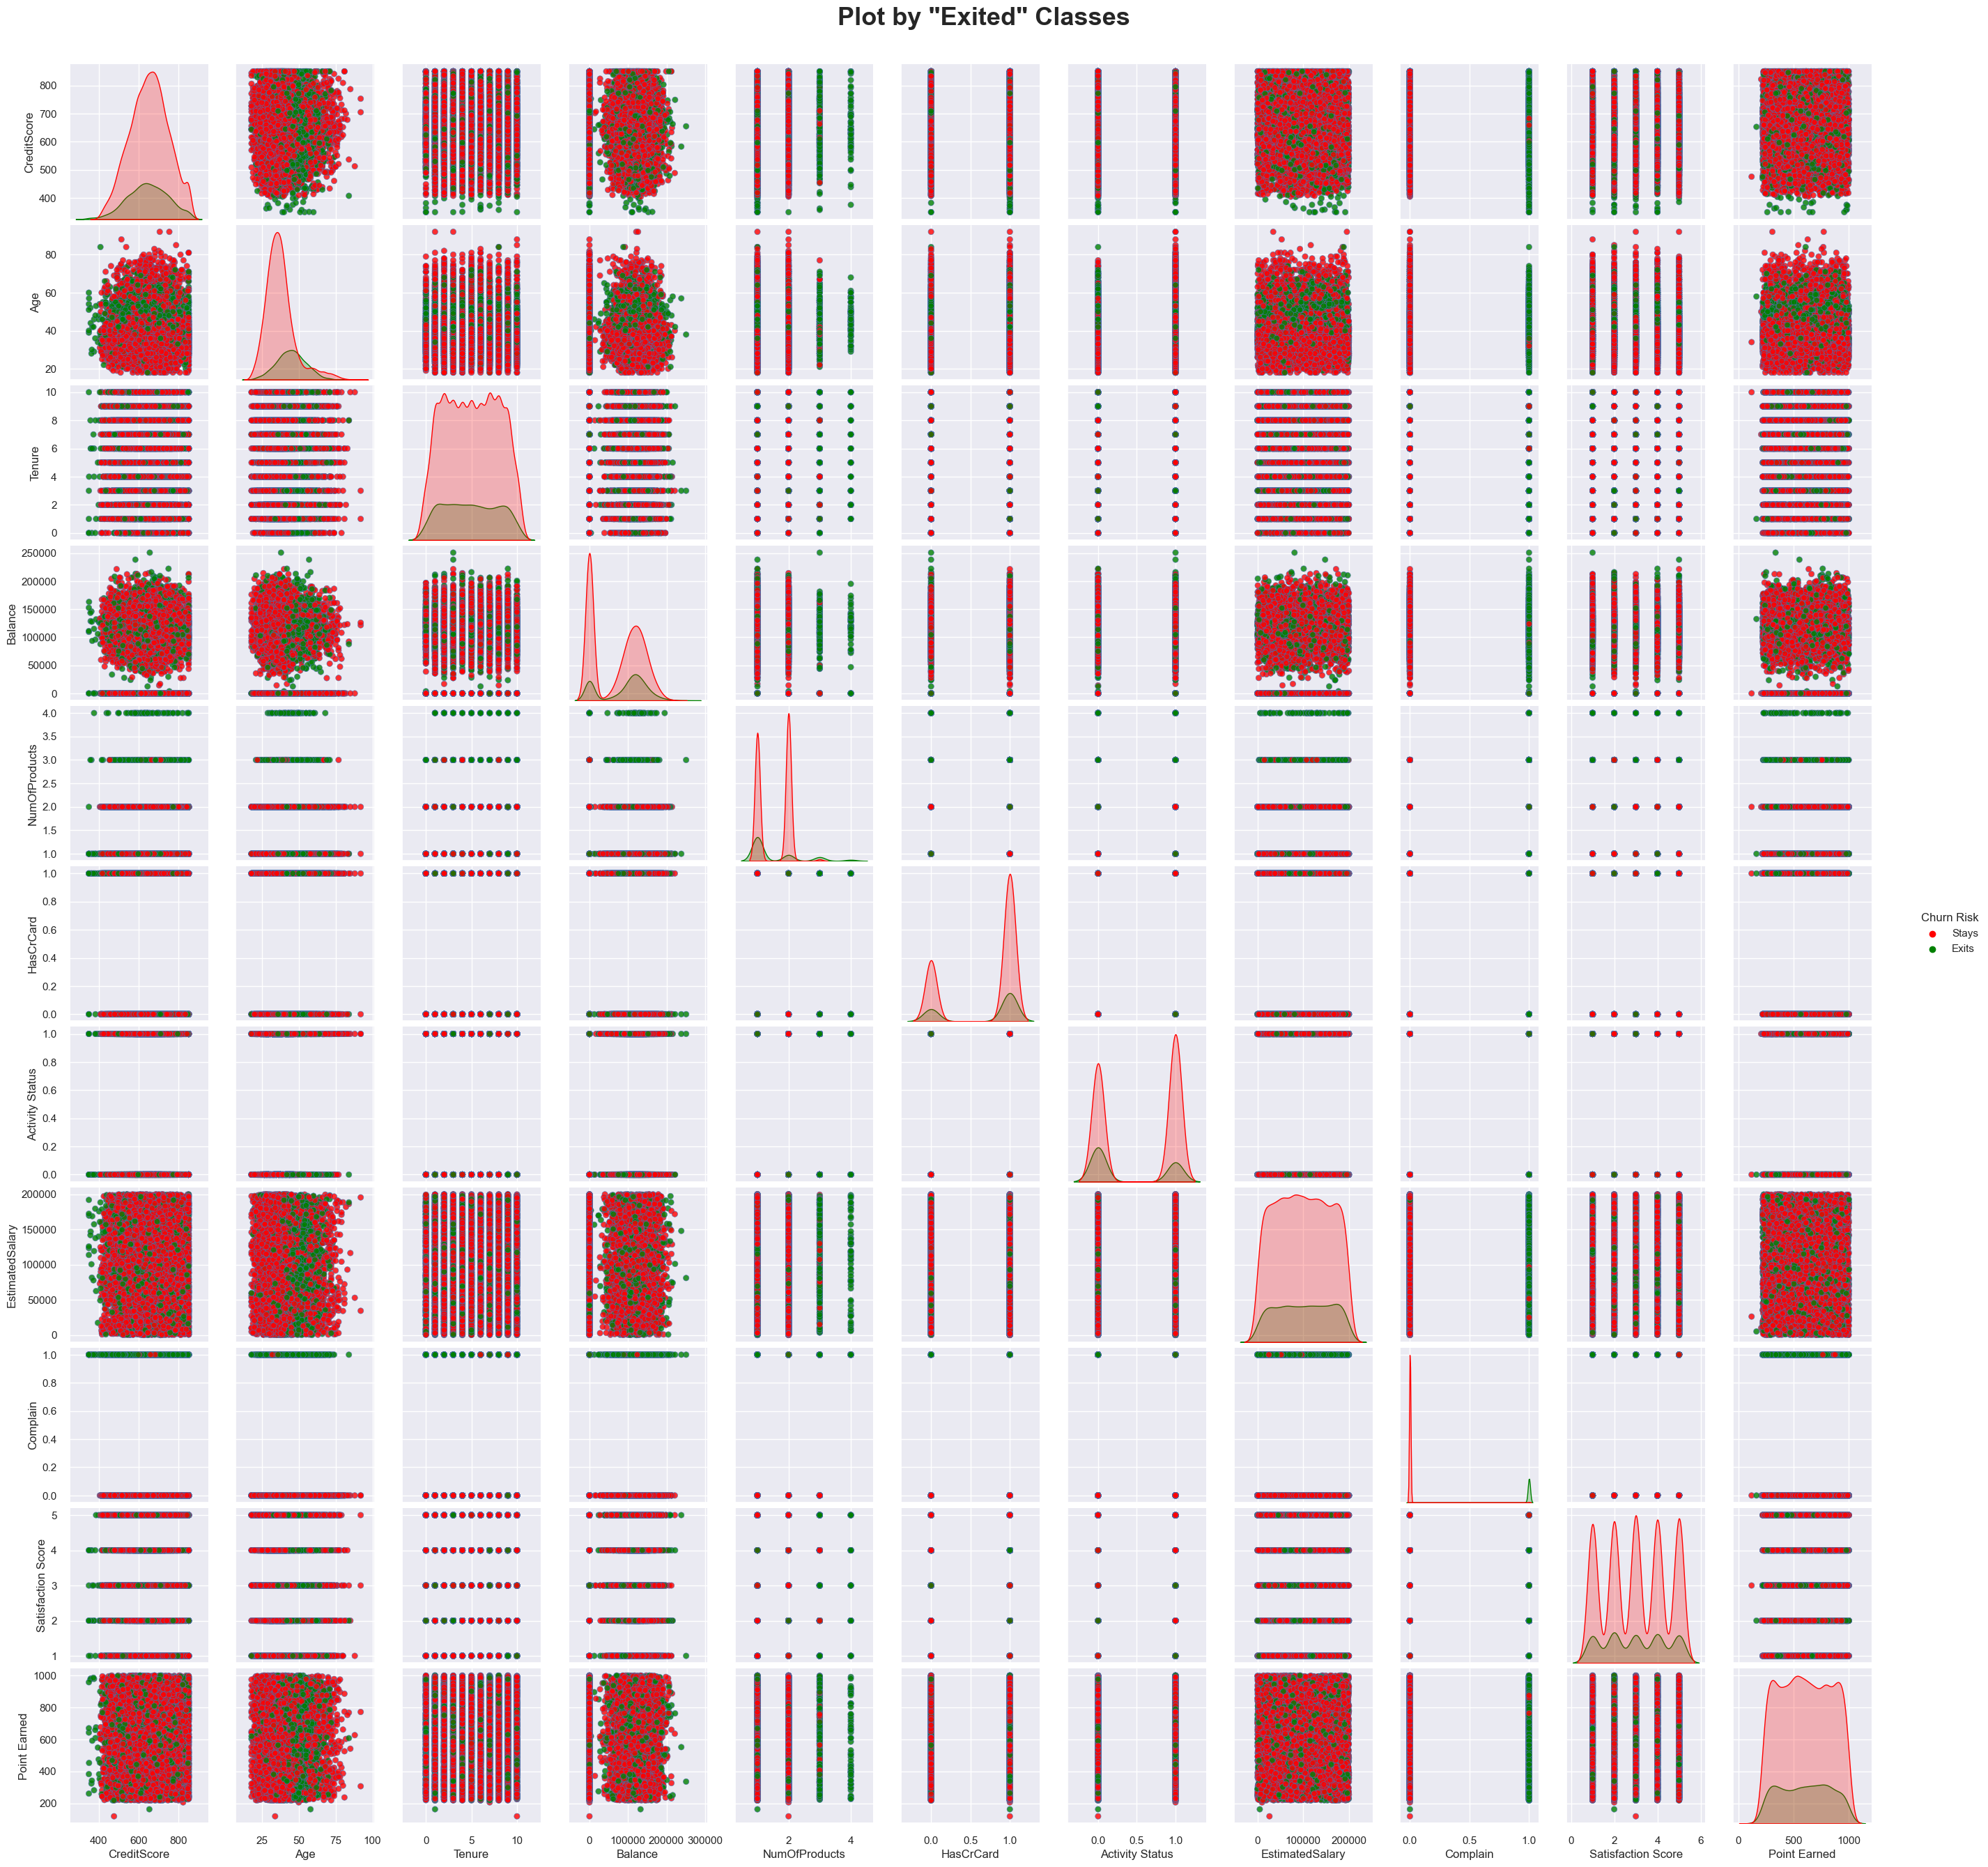

In [128]:
# Plot Seaborn's pairplot
g = sns.pairplot(df, hue='Churned Status',
                 palette={1 : 'green',
                          0 : 'red'},
                 plot_kws={'alpha' : 0.8, 'edgecolor' : 'b', 'linewidth' : 0.5})

fig = g.fig
fig.subplots_adjust(top=0.95, wspace=0.2)
fig.suptitle('Plot by "Exited" Classes',
             fontsize=26,
             fontweight='bold')


# Update the legend
new_title = 'Churn Risk'
g._legend.set_title(new_title)
# replace labels
new_labels = ['Stays', 'Exits']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

plt.show()

In [129]:
#load the dataset
df = pd.read_csv('Customer-Churn-Records.csv')

In [130]:
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  Complain  Satisfaction Score Card Type  \
0        101348.88       1         1                   2   DIAMOND   
1        112542.58       0         1                   3   DIAMOND   
2        113931.57       1         1                   3   DIAMOND   
3         93826.63       0         0                   5      GOLD   
4         79084.10       0         0                   5      GOLD   

   Point Earned  
0           464  
1           456  
2           377  
3           350  
4           425

In [131]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [132]:
df.head(2)

CreditScore Geography  Gender  Age  Tenure   Balance  NumOfProducts  \
0          619    France  Female   42       2      0.00              1   
1          608     Spain  Female   41       1  83807.86              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  Complain  \
0          1               1        101348.88       1         1   
1          0               1        112542.58       0         1   

   Satisfaction Score Card Type  Point Earned  
0                   2   DIAMOND           464  
1                   3   DIAMOND           456

In [133]:
from sklearn.preprocessing import LabelEncoder

# Identify the categorical columns
categorical_columns = ['Geography', 'Gender','Card Type']

# Perform label encoding
le = LabelEncoder()
for column in categorical_columns:
    df[column] = le.fit_transform(df[column])

# Verify the encoding

### This code calculates the correlation matrix for the DataFrame 'df' and selects only the 'Exited' column from the correlation matrix. It then plots a heatmap using Seaborn to visualize the correlation between each variable and the 'Exited' column. 

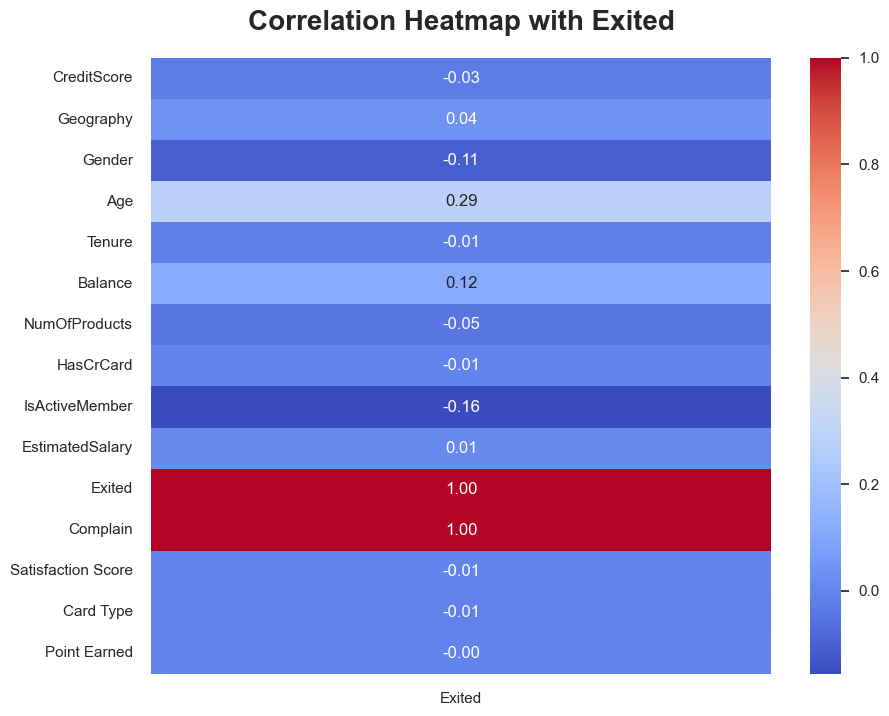

In [134]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = df.corr()

# Select only the 'Exited' column from the correlation matrix
corr_with_target = corr_matrix['Exited']

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_with_target.to_frame(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap with Exited',fontweight='bold',pad=20,fontsize=20)
plt.show()

# Key Insight
- There is a high correlation between churned customers and those who complain, indicating that the complain feature is crucial for accurately predicting whether a customer will churn or not.

# Part 2. Model Training

### The code snippet divides the DataFrame 'df' into two separate variables: 'X' and 'y'. 

In [135]:
X = df.drop('Exited',axis=1)
y = df['Exited']

### The code snippet uses the 'train_test_split' function from the 'sklearn.model_selection' module to split the feature data ('X') and target data ('y') into training and testing datasets.

In [136]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### The code snippet performs `feature selection` using `SelectKBest` with f_classif scoring method to select the top 5 features based on their scores.

In [137]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# Scale the training data and test data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create SelectKBest instance with k=5
k_best = SelectKBest(score_func=f_classif, k=5)

# Fit the instance on the scaled training data and target variable
k_best.fit(X_train_scaled, y_train)

# Get the scores of the features
feature_scores = pd.DataFrame({'Feature': X_train.columns, 'Score': k_best.scores_})

# Sort the feature scores in descending order
feature_scores = feature_scores.sort_values(by='Score', ascending=False)

# Select the top 5 features
top_5_features = feature_scores.head(5)['Feature'].tolist()

# Display the names of the top 5 features
print("Top 5 features:")
for feature in top_5_features:
    print(feature)

Top 5 features:
Complain
Age
IsActiveMember
Balance
Gender


### The code snippet performs feature selection using SelectKBest with chi2 scoring method to select the top 5 features based on their scores.

In [138]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import chi2
# Scale the training data and test data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create SelectKBest instance with k=5
k_best = SelectKBest(score_func=chi2, k=5)

# Fit the instance on the scaled training data and target variable
k_best.fit(X_train_scaled, y_train)

# Get the scores of the features
feature_scores = pd.DataFrame({'Feature': X_train.columns, 'Score': k_best.scores_})

# Sort the feature scores in descending order
feature_scores = feature_scores.sort_values(by='Score', ascending=False)

# Select the top 5 features
top_5_features = feature_scores.head(5)['Feature'].tolist()

# Display the names of the top 5 features
print("Top 5 features:")
for feature in top_5_features:
    print(feature)

Top 5 features:
Complain
IsActiveMember
Age
Gender
Balance


In [139]:
top_5_features

['Complain', 'IsActiveMember', 'Age', 'Gender', 'Balance']

### The code snippet creates a pie chart to visualize the distribution of customer churn using the 'Exited' column of the DataFrame 'df'.

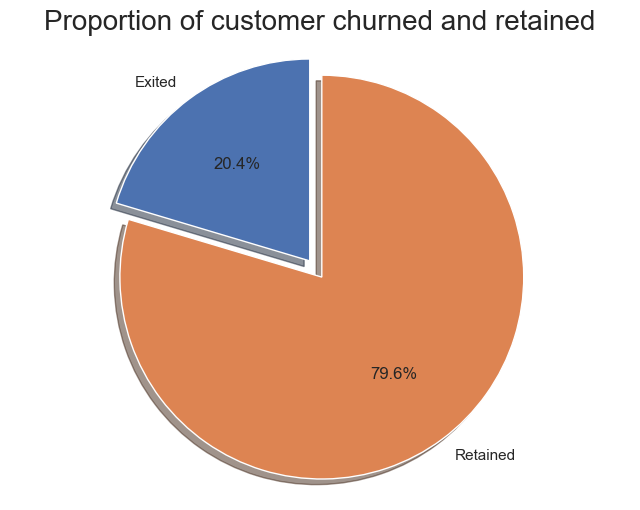

In [140]:
labels = 'Exited', 'Retained'
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(8, 6))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

# Key Insight
- Due to the imbalanced distribution of churned and not churned customers, the model may be biased towards predicting churn. Therefore, it is important to focus on other metrics rather than just accuracy when predicting the outcome of the model.

# Model Training

This code trains multiple classifiers including `Random Forest`, `Decision Tree`, `Logistic Regression`, `AdaBoost`, and `XGBoost` on a given dataset. It then evaluates the performance of each classifier by calculating `accuracy`, `precision`, `recall`, and `F1` score using test data. Additionally, it calculates mean `cross-validation` accuracy to assess the generalization of each classifier. Finally, it constructs a `stacking classifier` by combining the predictions of the base classifiers and makes predictions on the test data using the final estimator. The stacking classifier's performance is also evaluated and all the results are stored in a pandas dataframe.

In [141]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier

# Function to calculate mean cross-validation accuracy
def mean_cv_accuracy(estimator, X, y, cv=5):
    cv_scores = cross_val_score(estimator, X, y, cv=cv, scoring='accuracy')
    return np.mean(cv_scores)

# Create a list of classifiers
classifiers = [
    ("Random Forest", RandomForestClassifier()),
    ("Decision Tree", DecisionTreeClassifier()),
    ("Logistic Regression", LogisticRegression()),
    ("AdaBoost", AdaBoostClassifier()),
    ("XGBoost", XGBClassifier())
]

# Create empty lists to store results
results = []
mean_cv_scores = []

# Iterate through each classifier
for name, classifier in classifiers:
    # Fit the classifier on the training data
    classifier.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = classifier.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Calculate precision
    precision = precision_score(y_test, y_pred)
    
    # Calculate recall
    recall = recall_score(y_test, y_pred)

    # Calculate F1 score
    f1 = f1_score(y_test, y_pred)
    
    # Calculate mean cross-validation accuracy
    mean_cv_acc = mean_cv_accuracy(classifier, X_train, y_train)
    
    # Append results to lists
    results.append([name, accuracy, mean_cv_acc, precision, recall, f1])

# Create the stacking classifier with the base estimators and final estimator
stacking_classifier = StackingClassifier(
    estimators=classifiers,
    final_estimator=XGBClassifier()  # Choose any final estimator that you want
)

# Fit the stacking classifier on the training data
stacking_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred_stacking = stacking_classifier.predict(X_test)

# Calculate stacking accuracy
accuracy_stacking = accuracy_score(y_test, y_pred_stacking)

# Calculate stacking precision
precision_stacking = precision_score(y_test, y_pred_stacking)

# Calculate stacking recall
recall_stacking = recall_score(y_test, y_pred_stacking)

# Calculate stacking F1 score
f1_stacking = f1_score(y_test, y_pred_stacking)

# Calculate mean cross-validation accuracy for stacking
mean_cv_acc_stacking = mean_cv_accuracy(stacking_classifier, X_train, y_train)

# Append stacking results to the results list
results.append(["Stacking", accuracy_stacking, mean_cv_acc_stacking, precision_stacking, recall_stacking, f1_stacking])

# Create a pandas dataframe with the results
df_results = pd.DataFrame(results, columns=["Model", "Accuracy", "Mean CV Accuracy", "Precision", "Recall", "F1 Score"])

In [142]:
df_results

Model  Accuracy  Mean CV Accuracy  Precision    Recall  \
0        Random Forest    0.9990          0.998500   0.997455  0.997455   
1        Decision Tree    0.9980          0.997375   0.992405  0.997455   
2  Logistic Regression    0.7985          0.786375   0.428571  0.076336   
3             AdaBoost    0.9985          0.998125   0.994924  0.997455   
4              XGBoost    0.9990          0.998500   0.997455  0.997455   
5             Stacking    0.9985          0.998125   0.997449  0.994911   

   F1 Score  
0  0.997455  
1  0.994924  
2  0.129590  
3  0.996188  
4  0.997455  
5  0.996178

# Key Insight
- All the tree-based ML algorithms are performing well on this dataset.

# Comparison of Model Performance Metrics: Accuracy, Mean CV Accuracy, Precision, Recall, and F1 Score

This code visualizes the performance of different models across multiple evaluation metrics using bar plots. The first subplot displays the `accuracy` and `mean cross-validation accuracy` for each model, while the second subplot shows the `precision`, `recall`, and `F1 score`. 

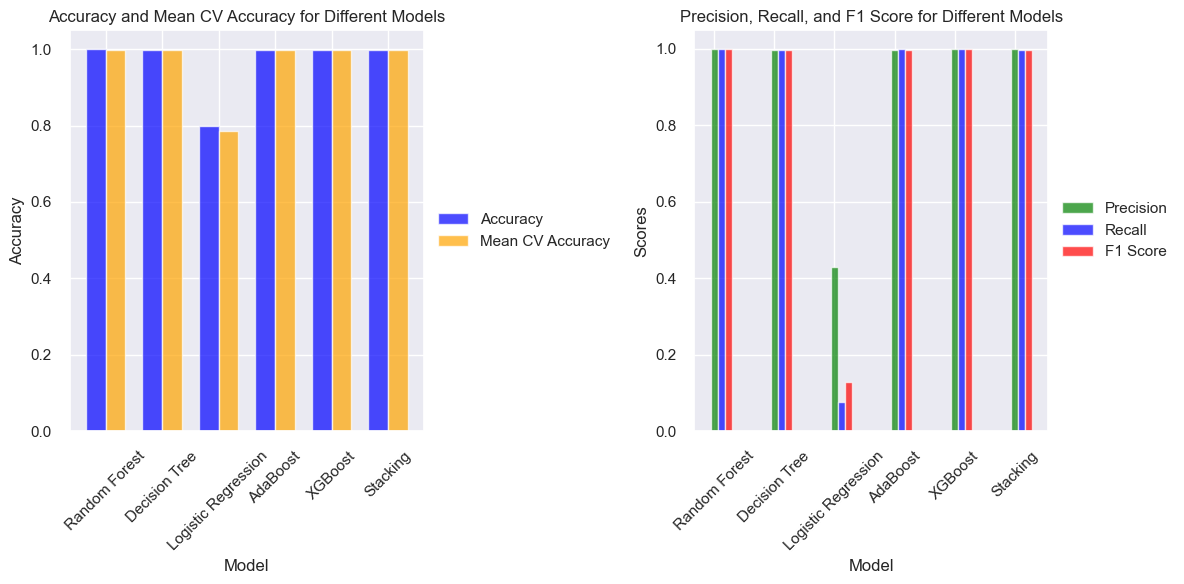

In [143]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Sample data (replace with your actual data)
df_results = pd.DataFrame({
    "Model": ["Random Forest", "Decision Tree", "Logistic Regression", "AdaBoost", "XGBoost", "Stacking"],
    "Accuracy": [0.999, 0.998, 0.798, 0.997875, 0.9985, 0.9985],
    "Mean CV Accuracy": [0.9985, 0.9975, 0.786375, 0.998125, 0.9985, 0.99825],
    "Precision": [0.997455, 0.994911, 0.428571, 0.994924, 0.997455, 0.997449],
    "Recall": [0.997455, 0.994911, 0.076336, 0.997455, 0.997455, 0.994911],
    "F1 Score": [0.997455, 0.994911, 0.12959, 0.996188, 0.997455, 0.996178],
})

# Set font size
plt.rcParams.update({'font.size': 12})

# Create figure and axes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot Accuracy and Mean CV Accuracy
bar_width = 0.35
models = df_results["Model"]
x = np.arange(len(models))
axes[0].bar(x - bar_width/2, df_results["Accuracy"], width=bar_width, label="Accuracy", color='blue', alpha=0.7)
axes[0].bar(x + bar_width/2, df_results["Mean CV Accuracy"], width=bar_width, label="Mean CV Accuracy", color='orange', alpha=0.7)
axes[0].set_xlabel("Model")
axes[0].set_ylabel("Accuracy")
axes[0].set_title("Accuracy and Mean CV Accuracy for Different Models")
axes[0].set_xticks(x)
axes[0].set_xticklabels(models, rotation=45)

# Plot Precision, Recall and F1 Score
bar_colors = ['green', 'blue', 'red']
labels = ["Precision", "Recall", "F1 Score"]
for i, label in enumerate(labels):
    axes[1].bar(x + i * bar_width/len(labels), df_results[label], width=bar_width/len(labels), label=label, color=bar_colors[i], alpha=0.7)
axes[1].set_xlabel("Model")
axes[1].set_ylabel("Scores")
axes[1].set_title("Precision, Recall, and F1 Score for Different Models")
axes[1].set_xticks(x)
axes[1].set_xticklabels(models, rotation=45)

# Move the legend outside the plot
axes[0].legend(loc='center left', bbox_to_anchor=(1, 0.5))
axes[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

# Receiver Operating Characteristic (ROC) Curve for Model Performance Evaluation

This code calculates the Receiver Operating Characteristic (ROC) curve and Area Under the Curve (AUC) for each classifier in the `classifiers` list. It uses the `roc_curve` and `auc` functions from scikit-learn to compute the false positive rate (FPR), true positive rate (TPR), and AUC value for each classifier. The ROC curve and AUC for each classifier are then plotted using `matplotlib.pyplot`. Finally, the ROC curve and AUC for the stacking classifier are also plotted. The resulting plot provides a visual representation of the performance of each classifier in terms of their ability to distinguish between the positive and negative classes.

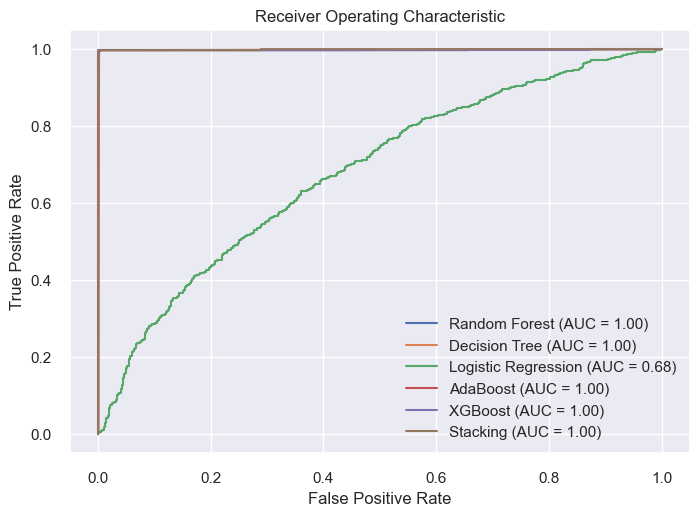

In [144]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Create empty lists to store AUC values
auc_values = []

# Iterate through each classifier
for name, classifier in classifiers:
    # Get predicted probabilities for the positive class
    y_pred_proba = classifier.predict_proba(X_test)[:, 1]

    # Calculate the false positive rate, true positive rate, and threshold for the classifier
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    
    # Calculate the AUC value
    roc_auc = auc(fpr, tpr)
    
    # Append the AUC value to the list
    auc_values.append((name, roc_auc))
    
    # Plot the ROC curve for the classifier
    plt.plot(fpr, tpr, label='%s (AUC = %0.2f)' % (name, roc_auc))

# Get predicted probabilities for the stacking classifier
y_pred_proba_stacking = stacking_classifier.predict_proba(X_test)[:, 1]

# Calculate the false positive rate, true positive rate, and threshold for the stacking classifier
fpr_stacking, tpr_stacking, thresholds_stacking = roc_curve(y_test, y_pred_proba_stacking)

# Calculate the AUC value for the stacking classifier
roc_auc_stacking = auc(fpr_stacking, tpr_stacking)

# Append the AUC value to the list
auc_values.append(("Stacking", roc_auc_stacking))

# Plot the ROC curve for the stacking classifier
plt.plot(fpr_stacking, tpr_stacking, label='Stacking (AUC = %0.2f)' % roc_auc_stacking)

# Set x-axis and y-axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Set the title of the plot
plt.title('Receiver Operating Characteristic')

# Show the legend
plt.legend()

# Show the plot
plt.show()